### Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
import os
import warnings
warnings.filterwarnings('ignore')

### Carregando os arquivos de dados geoquímicos previamente tratados

In [2]:
chem_I_grouped = pd.read_csv('sarig_rs_chem_expI_ed1.csv')
chem_II_grouped = pd.read_csv('sarig_rs_chem_expII_ed1.csv')
chem_III_grouped = pd.read_csv('sarig_rs_chem_expIII_ed1.csv')
chem_IV_grouped = pd.read_csv('sarig_rs_chem_expIV_ed1.csv')
chem_V_grouped = pd.read_csv('sarig_rs_chem_expV_ed1.csv')
chem_VI_grouped = pd.read_csv('sarig_rs_chem_expVI_ed1.csv')
chem_VII_grouped = pd.read_csv('sarig_rs_chem_expVII_ed1.csv')
chem_VIII_grouped = pd.read_csv('sarig_rs_chem_expVIII_ed1.csv')
chem_IX_grouped = pd.read_csv('sarig_rs_chem_expIX_ed1.csv')
chem_X_grouped = pd.read_csv('sarig_rs_chem_expX_ed1.csv')
chem_XI_grouped = pd.read_csv('sarig_rs_chem_expXI_ed1.csv')
chem_XII_grouped = pd.read_csv('sarig_rs_chem_expXII_ed1.csv')
chem_XIII_grouped = pd.read_csv('sarig_rs_chem_expXIII_ed1.csv')

### Checando a primeira tabela

Reorganizando a tabela para listar em ordem crescente de número de células preenchidas (ou seja, linhas com mais células vazias no topo)

In [3]:
chem_I_grouped = chem_I_grouped.iloc[chem_I_grouped.isnull().sum(1).sort_values(ascending=False).index]

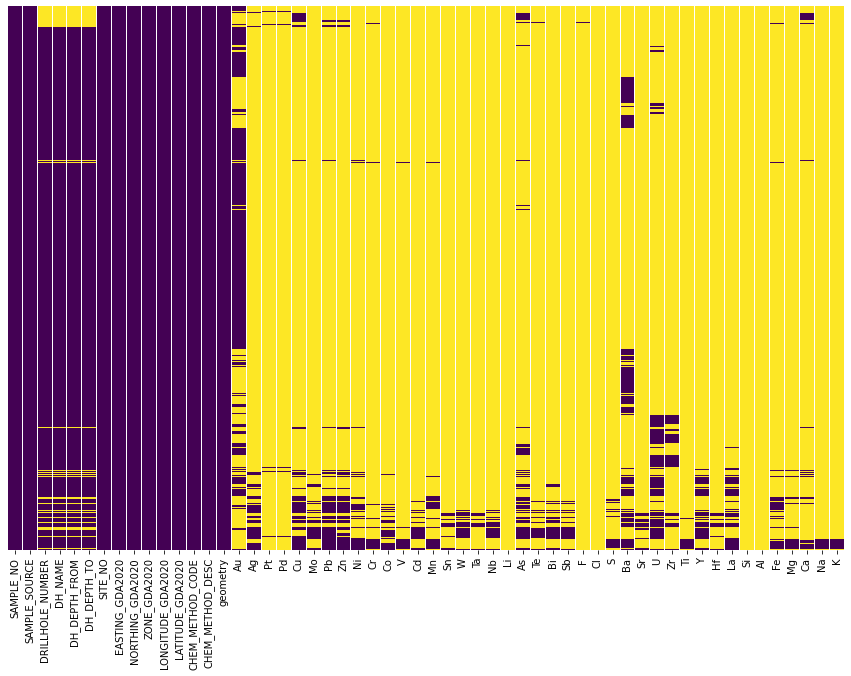

In [4]:
plt.figure(figsize=[15,10])
sns.heatmap(chem_I_grouped.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Concatenando as tabelas em um único banco de dados

In [5]:
chem = pd.concat([chem_I_grouped,chem_II_grouped,chem_III_grouped,chem_IV_grouped,chem_V_grouped,chem_VI_grouped,
                  chem_VII_grouped, chem_VIII_grouped,chem_IX_grouped,chem_X_grouped,chem_XI_grouped,chem_XII_grouped,
                  chem_XIII_grouped])

### Checando as informações da tabela

Há um total de 1.630.315 amostras

In [6]:
chem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1630315 entries, 14478 to 37702
Data columns (total 56 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   SAMPLE_NO          1630315 non-null  int64  
 1   SAMPLE_SOURCE      1630300 non-null  object 
 2   DRILLHOLE_NUMBER   1392122 non-null  float64
 3   DH_NAME            1392120 non-null  object 
 4   DH_DEPTH_FROM      1392261 non-null  float64
 5   DH_DEPTH_TO        1392227 non-null  float64
 6   SITE_NO            1630315 non-null  int64  
 7   EASTING_GDA2020    1630315 non-null  float64
 8   NORTHING_GDA2020   1630315 non-null  float64
 9   ZONE_GDA2020       1630315 non-null  int64  
 10  LONGITUDE_GDA2020  1630315 non-null  float64
 11  LATITUDE_GDA2020   1630315 non-null  float64
 12  CHEM_METHOD_CODE   1630315 non-null  object 
 13  CHEM_METHOD_DESC   1630315 non-null  object 
 14  geometry           1630315 non-null  object 
 15  Au                 819575 non-

### Checando as informações da coluna "SAMPLE_SOURCE"

O projeto será desenvolvido sobre amostras de solo a fim de desenvolver um algoritmo para detecção de potenciais alvos encobertos. Portanto, será feita uma seleção na tabela com base nessa premissa.

In [7]:
chem['SAMPLE_SOURCE'].unique()

array(['Soil', 'Rock outcrop / float', 'Stream sediment', 'Calcrete',
       'Auger sample from near surface', 'Lake floor sediment',
       'Rock outcrop sample',
       'Drilled interval rock sample, type unspecified',
       'Sawn half drill core', 'Drill core', 'Drill cuttings',
       'Sawn quarter drill core', 'Analytical standard check sample',
       'Aircore: consolidated sample from aircore drilling method',
       'Mine rock sample', 'Vegetation', 'A full face slice of core',
       'Duplicate: a split from an existing sample.',
       'Pulp / powdered rock of known origin, typically a lab return',
       nan, 'Mine stockpile', 'Gravel', 'Loam', 'Core sludge',
       'Excrement of animals', 'Drillhole',
       'Bulk (high volume) sample, diamond exploration'], dtype=object)

In [8]:
soil_chem = chem[(chem['SAMPLE_SOURCE'] == 'Soil') | (chem['SAMPLE_SOURCE'] == 'Calcrete') | 
     (chem['SAMPLE_SOURCE'] == 'Auger sample from near surface') | (chem['SAMPLE_SOURCE'] == 'Lake floor sediment')]

### Checando as informações da seleção realizada

Filtrando os dados para conter apenas análises de solo, reduzimos o número de amostras para 211.278

In [9]:
soil_chem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211278 entries, 14478 to 26192
Data columns (total 56 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SAMPLE_NO          211278 non-null  int64  
 1   SAMPLE_SOURCE      211278 non-null  object 
 2   DRILLHOLE_NUMBER   3328 non-null    float64
 3   DH_NAME            3328 non-null    object 
 4   DH_DEPTH_FROM      3443 non-null    float64
 5   DH_DEPTH_TO        3413 non-null    float64
 6   SITE_NO            211278 non-null  int64  
 7   EASTING_GDA2020    211278 non-null  float64
 8   NORTHING_GDA2020   211278 non-null  float64
 9   ZONE_GDA2020       211278 non-null  int64  
 10  LONGITUDE_GDA2020  211278 non-null  float64
 11  LATITUDE_GDA2020   211278 non-null  float64
 12  CHEM_METHOD_CODE   211278 non-null  object 
 13  CHEM_METHOD_DESC   211278 non-null  object 
 14  geometry           211278 non-null  object 
 15  Au                 150873 non-null  float64
 16 

### Checando as informações da coluna "CHEM_METHOD_DESC"

A utilização de análises químicas de solo para revelar depósitos ocultos sob dezenas de metros de cobertura sedimentar está condicionada a utilização de métodos de digestão parcial (abertura fraca). Ao não abrir a estrutura dos silicatos, tenta-se minimizar o efeito dos processos formadores de rocha e maximizar a influência dos elementos adsorvidos na parede dos minerais e que podem ter sido transportados até a superfície através de advecção através da zona vadosa.

Portanto, será feita uma seleção na tabela com base nessa premissa.

In [10]:
soil_chem['CHEM_METHOD_DESC'].unique()

array(['Acid dissolution followed by atomic absorption measurements on the cold vapour.',
       'AAS2', 'Selective Ion Electrode - Fluorine (Acid Soluble)',
       '50g fire assay, lead collection, ICP-MS finish',
       'Graphite furnace atomic absorption spectrometry 10g charge, solvent extraction, AAS determination.',
       'Lead collection fire assay 50g charge, flame AAS determination.',
       'X-Ray Fluorescence Spectrometry',
       'Inductively Coupled Plasma Optical Emission Spectrometry',
       '0.2g; perchloric acid; AAS determination', 'BLEG1C',
       'Aqua Regia digest, Inductively Coupled Plasma Optical Emission Spectrometry determination.',
       '0.5g sample, mixed acid digest including HF, ICP-MS determination.',
       'Aqua Regia digest 25g, ICP-MS determination',
       'Flame Atomic Absorption Spectroscopy',
       'Inductively Coupled Plasma Spectrometry.', 'Fire Assay AAS',
       '24hr static cyanide leach (0.1%), DIBK extraction, AAS',
       'HFSTB then 

In [11]:
soil_chem = soil_chem[(soil_chem['CHEM_METHOD_DESC'] == 'Mobile Metal Ions') | 
                      (soil_chem['CHEM_METHOD_DESC'] == 'MMI - mobile metal ions (FGFLAH)') | 
                      (soil_chem['CHEM_METHOD_DESC'] == 'Partial leach (MMI), ICP-MS determination. (Numeric suffix denotes proprietary solvent method).') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Terra Leach partial digest geochemistry. A very weak acid based digest designed to de-sorb base metals and other elements in non-alkaline soils.') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Terra Leach partial digest geochemistry. Weak acid EDTA digest designed for Cu, Pb, Zn. Ideal for base metals in alkaline soils.') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Terra Leach partial digest geochemistry, AAS determination.') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Terra Leach partial digest geochemistry for non-particulate Au, AAS determination.') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Mobile Metal Ions - partial leach technology, ICP-MS follow-up') | 
                      (soil_chem['CHEM_METHOD_DESC'] == 'Partial leach (MMI), ICP-MS determination (AAS for Fe, Mn). (Numeric suffix denotes proprietary solvent method).') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Terra Leach partial digest geochemistry, ICP- MS determination.') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Terra Leach partial digest geochemistry. Very weak acid digest designed to de-sorb base metals and other elements in non-alkaline soils.') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Terra Leach partial digest geochemistry for non-particulate Au, ICP- MS determination.') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Aqua Regia digest, Inductively Coupled Plasma Optical Emission Spectrometry determination.') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Aqua Regia digest 25g, ICP-MS determination') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Aqua Regia digest, Atomic Absorption Spectrometry') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Base metals: Aqua regia digest, AAS determination.') |
                      (soil_chem['CHEM_METHOD_DESC'] == '30g; aqua regia; carbon rod') |
                      (soil_chem['CHEM_METHOD_DESC'] == '30g; aqua regia; AAS, OR 2g; perchloric acid; AAS') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Digest - aqua regia/perchloric acid/hydrofluoric acids (0.2g sample), ICP-MS determination') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Aqua regia digest, AAS determination.') |
                      (soil_chem['CHEM_METHOD_DESC'] == '30g; aqua regia digest, carbon rod collection, AAS determination.') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Aqua Regia digest 25g, ICP-OES determination') |
                      (soil_chem['CHEM_METHOD_DESC'] == '30g, aqua regia, carbon rod') |
                      (soil_chem['CHEM_METHOD_DESC'] == '25g sample; roasted, aqua regia digested, extracted into 336/DIBK, backwashed with dilute nitric acid, analysed by AAS') |
                      (soil_chem['CHEM_METHOD_DESC'] == '30g aqua regia; AAS finish') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Aqua regia digest for base metals, AAS determination.') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Low level Au: Aqua regia digest, DIBK extraction, carbon rod AAS determination.') |
                      (soil_chem['CHEM_METHOD_DESC'] == '1 gm mini Aqua Regia digest ij test tubes, Enhanced ICP-OES determination.') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Gold analysis by aqua regia extraction with ICP-MS finish.') |
                      (soil_chem['CHEM_METHOD_DESC'] == '10g sample, Aqua Regia digest, combination ICP-MS and ICP-OES determination.') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Calcrete samples: Total aqua regia digest, ICP-OES finish.') |
                      (soil_chem['CHEM_METHOD_DESC'] == '25g nominal sample weight, trace level Au, aqua regia digest with AAS or ICP-MS determinations.') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Aqua regia digest, gold extracted with organic agent, analysis by atomic absorption spectroscopy.') |
                      (soil_chem['CHEM_METHOD_DESC'] == '30g sample, ultratrace by ICP-MS analysis after aqua regia digestion.') |
                      (soil_chem['CHEM_METHOD_DESC'] == '0.5g sample, Aqua Regia leach, combination ICP-MS and ICP-AES determination.') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Partial digest technique using a dilute HCl partial leach.') |
                      (soil_chem['CHEM_METHOD_DESC'] == '20gm sample, aqua regia digest, ICP-OES / ICP-MS determination depending on analyte. ICP-OES: As Ca Cr Cu Fe Mg Mn Ni P V Zn. ICP-MS: Ag Au Bi Cd Co Ga Mo Pb Pt Sb Se Te Th Tl U W.') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Aqua Regia digest, AAS') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Aqua regia digestion, flame AAS.') |
                      (soil_chem['CHEM_METHOD_DESC'] == 'Aqua regia digest Bulk Leach Extractable Gold, Inductively Coupled Plasma Mass Spectrometry.')]

### Checando as informações da seleção realizada

Filtrando os dados para conter apenas análises de solo de abertura branda, reduzimos o número de amostras para 113.934.

In [12]:
soil_chem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113934 entries, 15761 to 164740
Data columns (total 56 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SAMPLE_NO          113934 non-null  int64  
 1   SAMPLE_SOURCE      113934 non-null  object 
 2   DRILLHOLE_NUMBER   987 non-null     float64
 3   DH_NAME            987 non-null     object 
 4   DH_DEPTH_FROM      1076 non-null    float64
 5   DH_DEPTH_TO        1046 non-null    float64
 6   SITE_NO            113934 non-null  int64  
 7   EASTING_GDA2020    113934 non-null  float64
 8   NORTHING_GDA2020   113934 non-null  float64
 9   ZONE_GDA2020       113934 non-null  int64  
 10  LONGITUDE_GDA2020  113934 non-null  float64
 11  LATITUDE_GDA2020   113934 non-null  float64
 12  CHEM_METHOD_CODE   113934 non-null  object 
 13  CHEM_METHOD_DESC   113934 non-null  object 
 14  geometry           113934 non-null  object 
 15  Au                 89608 non-null   float64
 16

### Checando graficamente a seleção realizada

Lembrar que essa plotagem é como se fosse um grande raio-x da tabela, fazendo a distinção entre células vazias (amarelo) e preenchidas (roxo).

É possível observar que a maioria das amostras tem um número pequeno de elementos analisados, o que reduz sua aplicabilidade. Todavia, um conjunto de amostras na parte inferior da tabela tem um número razoável de amostras.

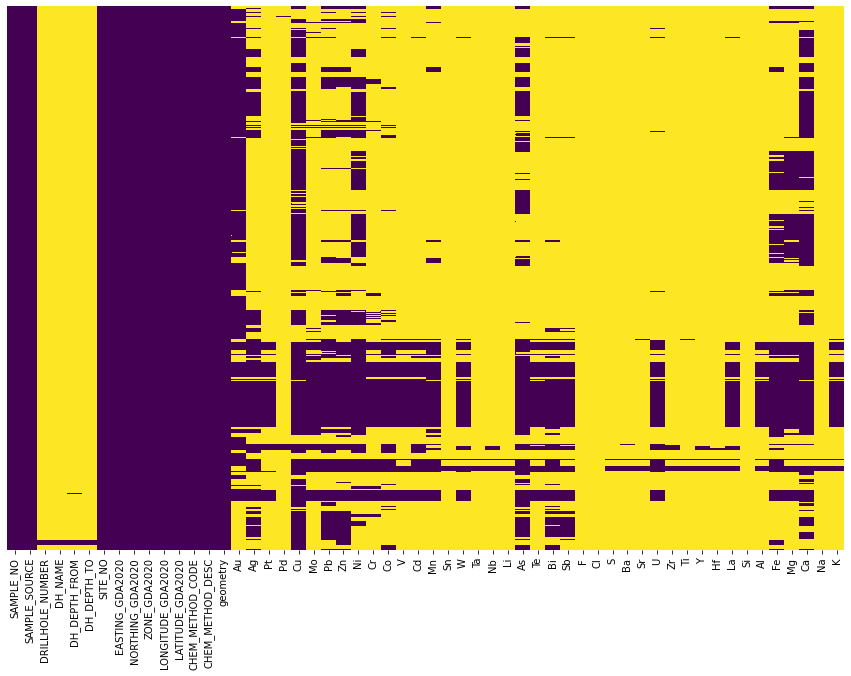

In [13]:
plt.figure(figsize=[15,10])
sns.heatmap(soil_chem.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Salvando o arquivo de seleção

In [16]:
soil_chem.to_csv('sarig_rs_chem_soil_partial_digest.csv')

In [2]:
soil_chem = pd.read_csv('sarig_rs_chem_soil_partial_digest.csv')

### Selecionando apenas amostras com um grande rol de elementos analisados (pelo menos 10)

In [3]:
soil_chem_subset = soil_chem.dropna(subset=['Au','Ag','Pt','Pd','Cu','Mo','Pb','Zn','Ni','Cr','Co','V','Cd','Mn','Sn','W',
                                        'Ta','Nb','Li','As','Te','Bi','Sb','F','Cl','S','Ba','Sr','U','Zr','Ti','Y','Hf',
                                        'La','Si','Al','Fe','Mg','Ca','Na','K'],thresh=10)

### Checando a seleção realizada

Reduziu-se o número de amostras para 24.826.

In [4]:
soil_chem_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24826 entries, 433 to 111951
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24826 non-null  int64  
 1   SAMPLE_NO          24826 non-null  int64  
 2   SAMPLE_SOURCE      24826 non-null  object 
 3   DRILLHOLE_NUMBER   0 non-null      float64
 4   DH_NAME            0 non-null      object 
 5   DH_DEPTH_FROM      89 non-null     float64
 6   DH_DEPTH_TO        59 non-null     float64
 7   SITE_NO            24826 non-null  int64  
 8   EASTING_GDA2020    24826 non-null  float64
 9   NORTHING_GDA2020   24826 non-null  float64
 10  ZONE_GDA2020       24826 non-null  int64  
 11  LONGITUDE_GDA2020  24826 non-null  float64
 12  LATITUDE_GDA2020   24826 non-null  float64
 13  CHEM_METHOD_CODE   24826 non-null  object 
 14  CHEM_METHOD_DESC   24826 non-null  object 
 15  geometry           24826 non-null  object 
 16  Au                 

### Checando graficamente a seleção realizada

Verifica-se agora que o número de campos vazios foi reduzido drasticamente. Entretanto, para a análise pretendida, não pode haver células vazias. Desse modo, iremos refinar a tabela removendo linhas e colunas até obter um banco de dados completamente preenchido.

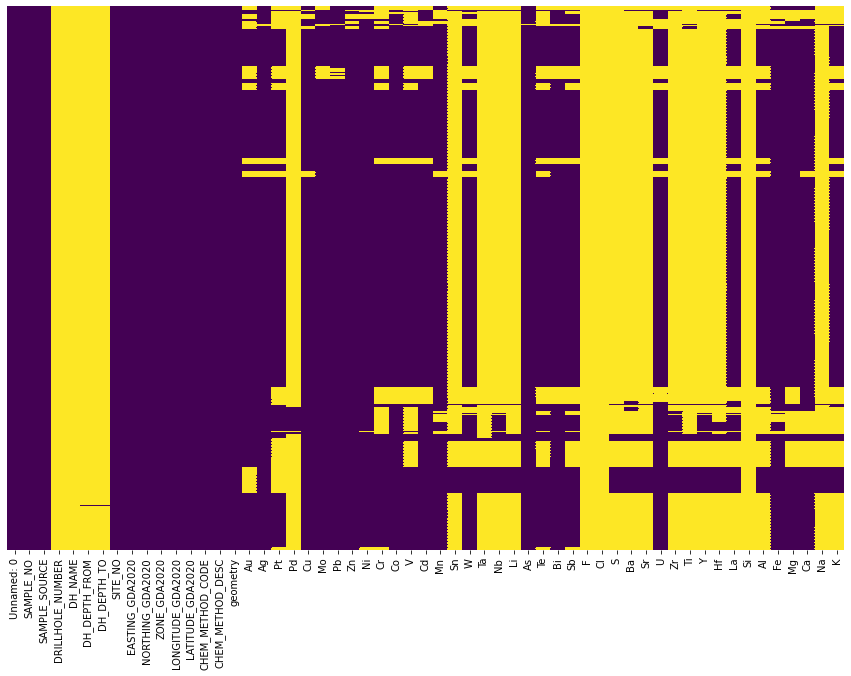

In [5]:
plt.figure(figsize=[15,10])
sns.heatmap(soil_chem_subset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
soil_chem_subset.dropna(subset=['Zn'],inplace=True)

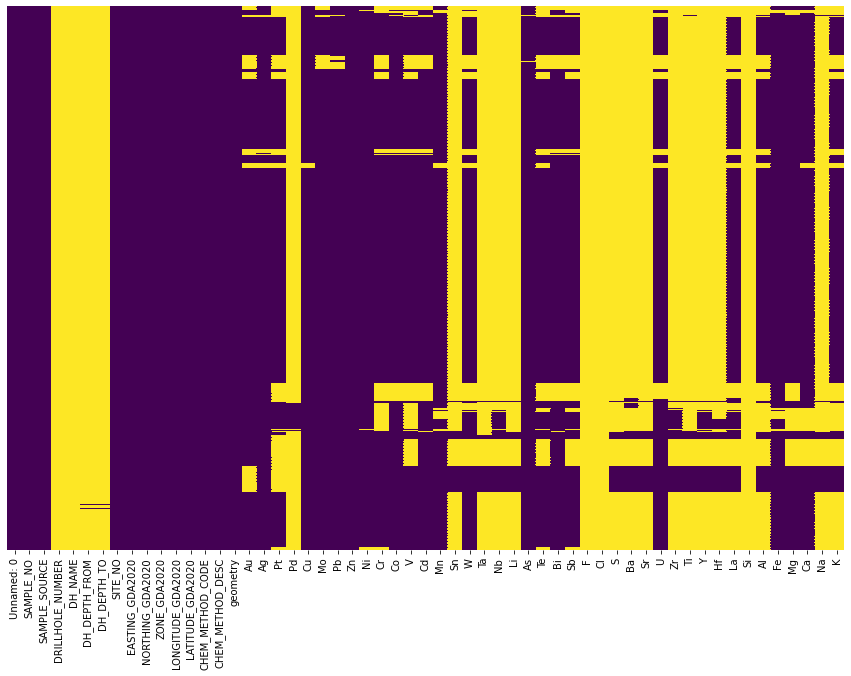

In [7]:
plt.figure(figsize=[15,10])
sns.heatmap(soil_chem_subset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
soil_chem_subset.dropna(subset=['Au','Ag','Pt','Cu','Mo','Pb','Zn','Ni','Cr','Co','V','Cd','Mn','W','As','Te','Bi',
                                 'Sb','U','La','Al','Fe','Mg','Ca','K'],inplace=True)

Após limpeza parcial, obteve-se uma tabela completamente preenchida para os seguintes elementos: Au, Ag, Pt, Cu, Mo, Pb, Zn, Ni, Cr, Co, V, Cd, Mn, W, As, Te, Bi, Sb, U, La, Al, Fe, Mg, Ca, K

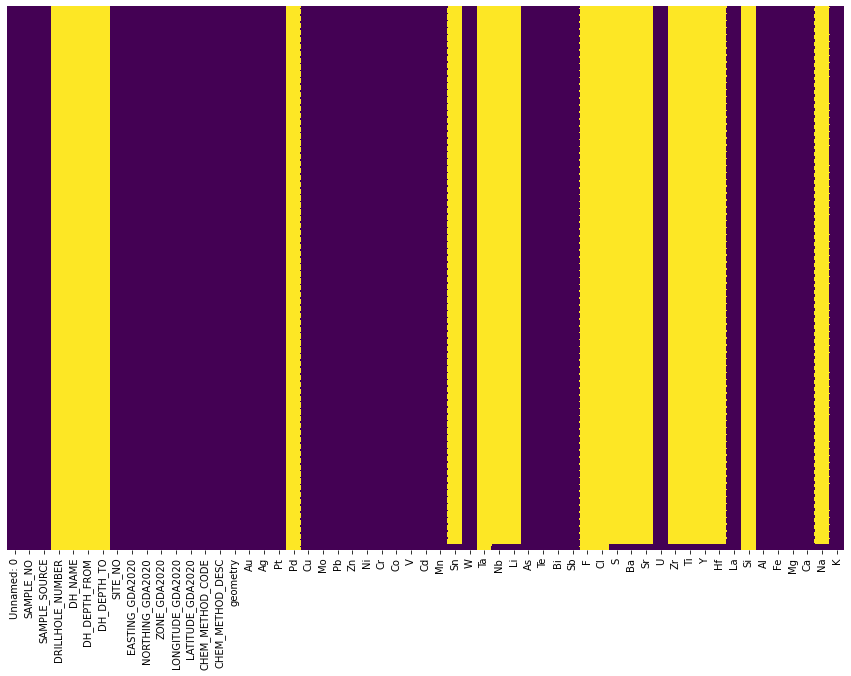

In [9]:
plt.figure(figsize=[15,10])
sns.heatmap(soil_chem_subset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Checando a seleção realizada

Ao final da limpeza de dados, obteve-se uma tabela com 15.142 amostras com 25 elementos (sem dados faltantes)

In [10]:
soil_chem_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15142 entries, 70481 to 95009
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15142 non-null  int64  
 1   SAMPLE_NO          15142 non-null  int64  
 2   SAMPLE_SOURCE      15142 non-null  object 
 3   DRILLHOLE_NUMBER   0 non-null      float64
 4   DH_NAME            0 non-null      object 
 5   DH_DEPTH_FROM      0 non-null      float64
 6   DH_DEPTH_TO        0 non-null      float64
 7   SITE_NO            15142 non-null  int64  
 8   EASTING_GDA2020    15142 non-null  float64
 9   NORTHING_GDA2020   15142 non-null  float64
 10  ZONE_GDA2020       15142 non-null  int64  
 11  LONGITUDE_GDA2020  15142 non-null  float64
 12  LATITUDE_GDA2020   15142 non-null  float64
 13  CHEM_METHOD_CODE   15142 non-null  object 
 14  CHEM_METHOD_DESC   15142 non-null  object 
 15  geometry           15142 non-null  object 
 16  Au                

### Transformando a tabela em um dado geográfico e plotando sobre os limites da área de estudo

Verifica-se que com a redução, apesar de termos dados agora que não cobrem toda a região proposta, ainda cobre-se uma extensão considerável, sendo apto para aplicação no estudo.

In [11]:
soil_chem_subset = gpd.GeoDataFrame(soil_chem_subset,geometry=gpd.points_from_xy(x=soil_chem_subset.LONGITUDE_GDA2020,y=soil_chem_subset.LATITUDE_GDA2020))

In [12]:
boundary = gpd.read_file(r"C:\Users\gabri\Gawler Challenge 2020\Project Outline\GCAS_Boundary.shp")

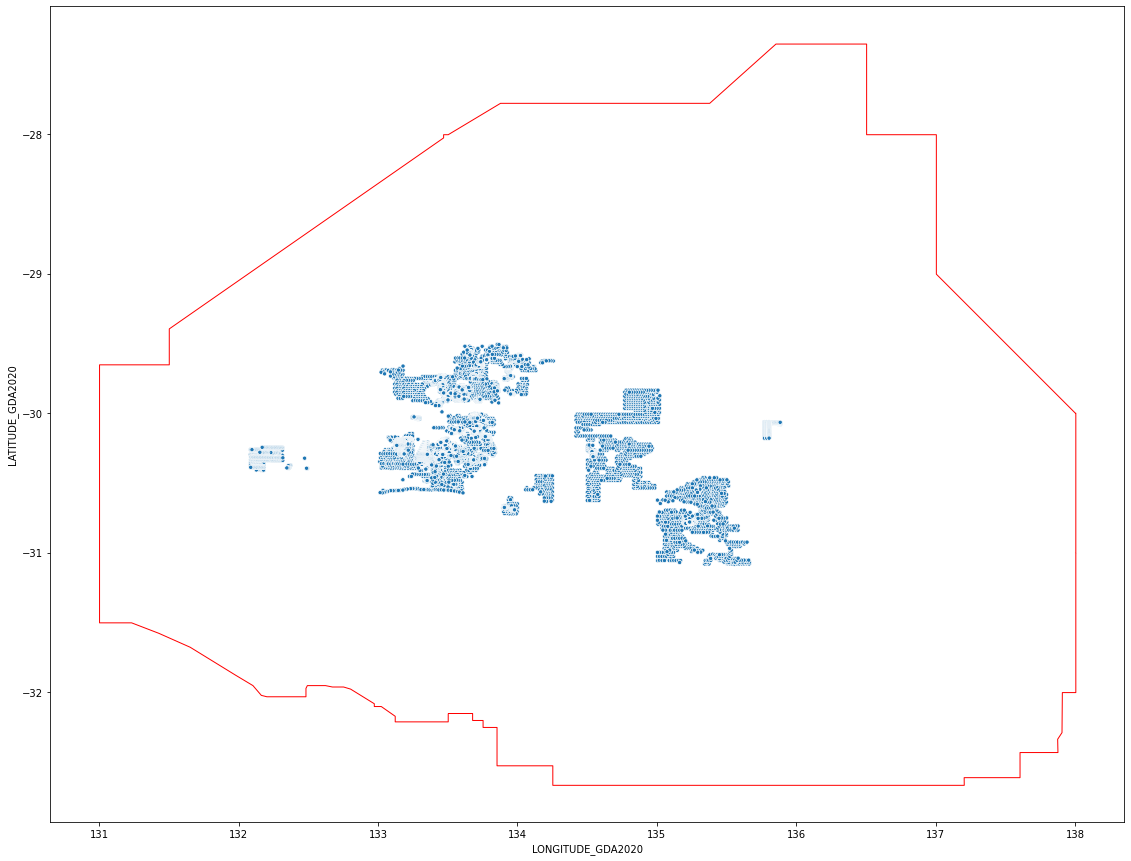

In [13]:
fig,ax = plt.subplots(figsize=[20,15])
boundary.plot(ax=ax,facecolor="white",edgecolor="red")
sns.scatterplot(data=soil_chem_subset,x="LONGITUDE_GDA2020",y="LATITUDE_GDA2020",ax=ax,size=0.3,legend=False)

### Criando uma tabela apenas com a identificação das amostras e os elementos selecionados

In [14]:
soil_chem_vf = soil_chem_subset[['SAMPLE_NO','Au','Ag','Pt','Cu','Mo','Pb','Zn','Ni','Cr','Co','V','Cd','Mn','W','As',
                                 'Te','Bi','Sb','U','La','Al','Fe','Mg','Ca','K']]

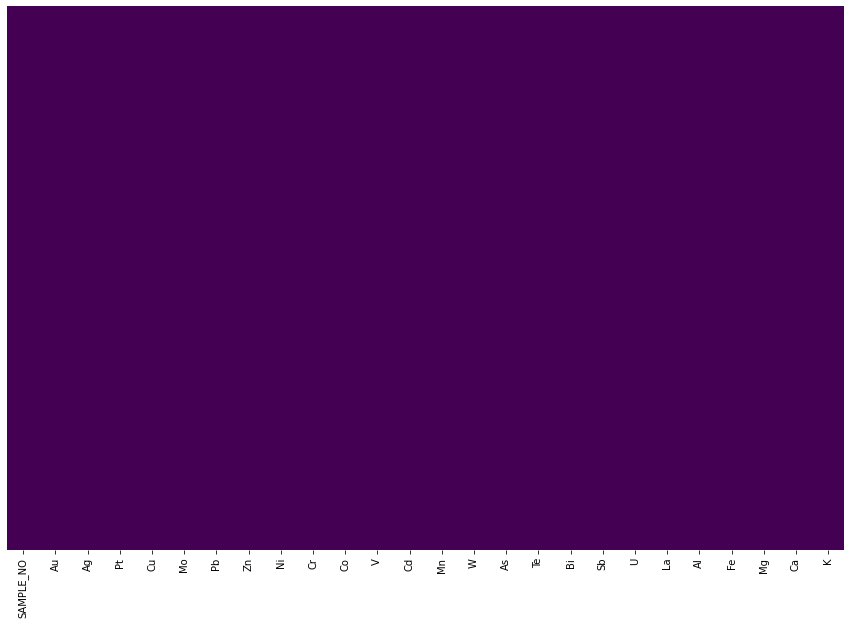

In [15]:
plt.figure(figsize=[15,10])
sns.heatmap(soil_chem_vf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
soil_chem_vf.set_index('SAMPLE_NO',drop=True,inplace=True)

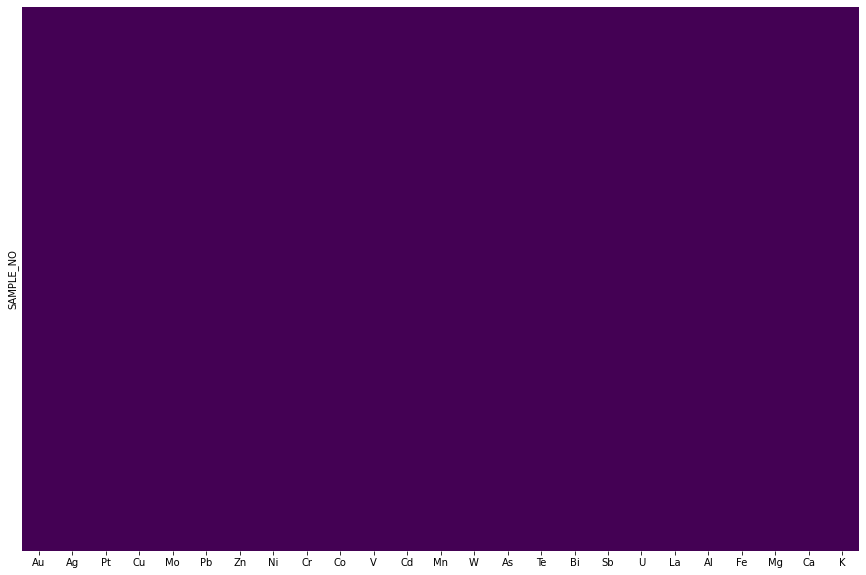

In [17]:
plt.figure(figsize=[15,10])
sns.heatmap(soil_chem_vf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Checando a tabela e confirmando que ela está totalmente preenchida

In [18]:
soil_chem_vf.head()

,Au,Ag,Pt,Cu,Mo,Pb,Zn,Ni,Cr,Co,...,Te,Bi,Sb,U,La,Al,Fe,Mg,Ca,K
SAMPLE_NO,,,,,,,,,,,,,,,,,,,,,
519569,0.003,0.025,0.0005,6.5,0.6,2.5,4.5,18.0,35.0,3.6,...,0.1,0.05,0.05,0.35,12.0,3500.0,9000.0,5200.0,298000.0,1050.0
519570,0.003,0.025,0.0005,17.5,0.8,2.0,6.0,18.0,35.0,4.9,...,0.1,0.05,0.05,0.50,4.4,3750.0,7500.0,18100.0,205000.0,850.0
519571,0.005,0.025,0.0005,13.0,1.0,2.0,6.0,21.0,30.0,4.9,...,0.1,0.10,0.05,0.35,5.5,3500.0,8800.0,11600.0,251000.0,800.0
519572,0.002,0.025,0.0005,7.0,0.5,2.0,4.0,19.0,20.0,6.0,...,0.1,0.05,0.05,0.25,9.5,2750.0,5900.0,4500.0,308000.0,850.0
519573,0.005,0.025,0.0005,7.5,2.3,3.0,4.0,16.0,60.0,5.0,...,0.1,0.05,0.05,0.40,5.5,5050.0,12100.0,5900.0,203000.0,750.0


### Calculando a correlação entre os elementos e plotando em um mapa de calor

Observações importantes:

1. Alta correlação entre V e Fe, indicando que sua distribuição está condicionada à existência de titanomagnetitas vanadíferas, tipicamente associadas com complexos máfico-ultramáficos acamadados
2. Boa correlação entre As e Te, elementos tipicamente associados ao Au. Contudo, a baixíssima correlação entre Au e As (-0.025) indica que se houver mineralização aurífera, ela não é do tipo orogênica (como ocorre no Quadrilátero).
3. Boa correlação entre Cu, Ni e Co, indicando que eventuais mineralizações cupríferas na região podem estar associadas a litotipos ultramáficos

In [19]:
soil_chemcorr = soil_chem_vf.corr()

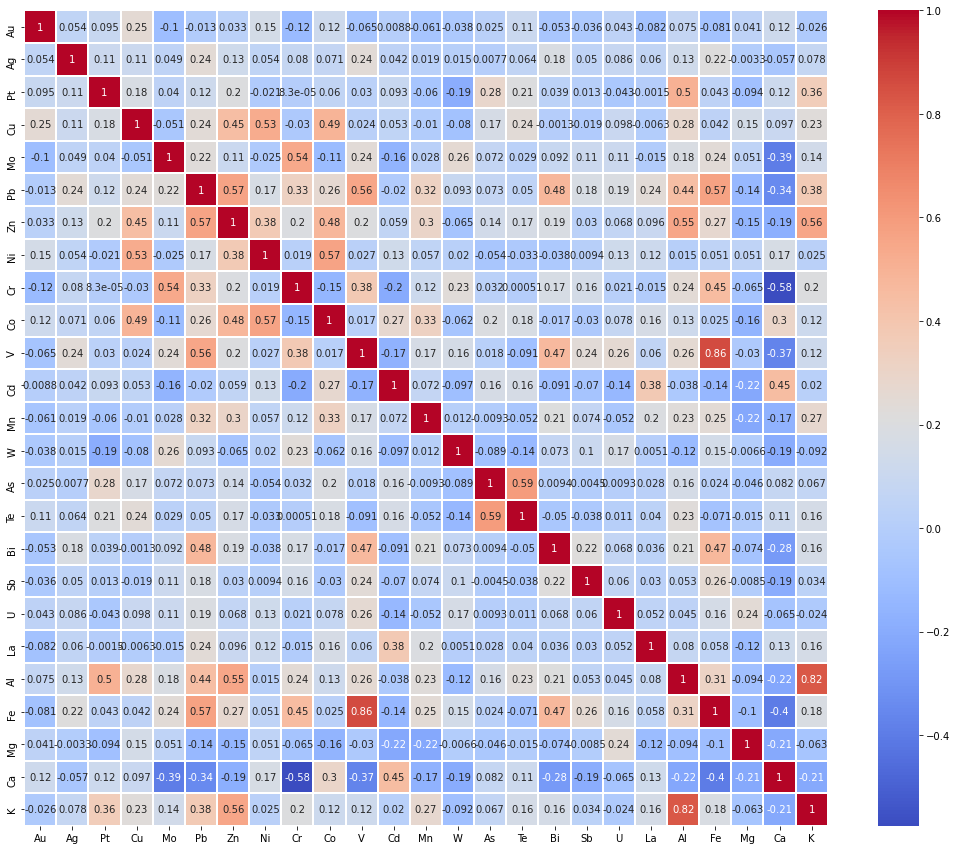

In [20]:
plt.figure(figsize=(18,15))
sns.heatmap(soil_chemcorr,annot=True,cmap='coolwarm',linecolor='white',linewidth=1)

### Mapas de cluster dos elementos e de seus coeficientes de correlação 

Não consegui deduzir nada desses gráficos!

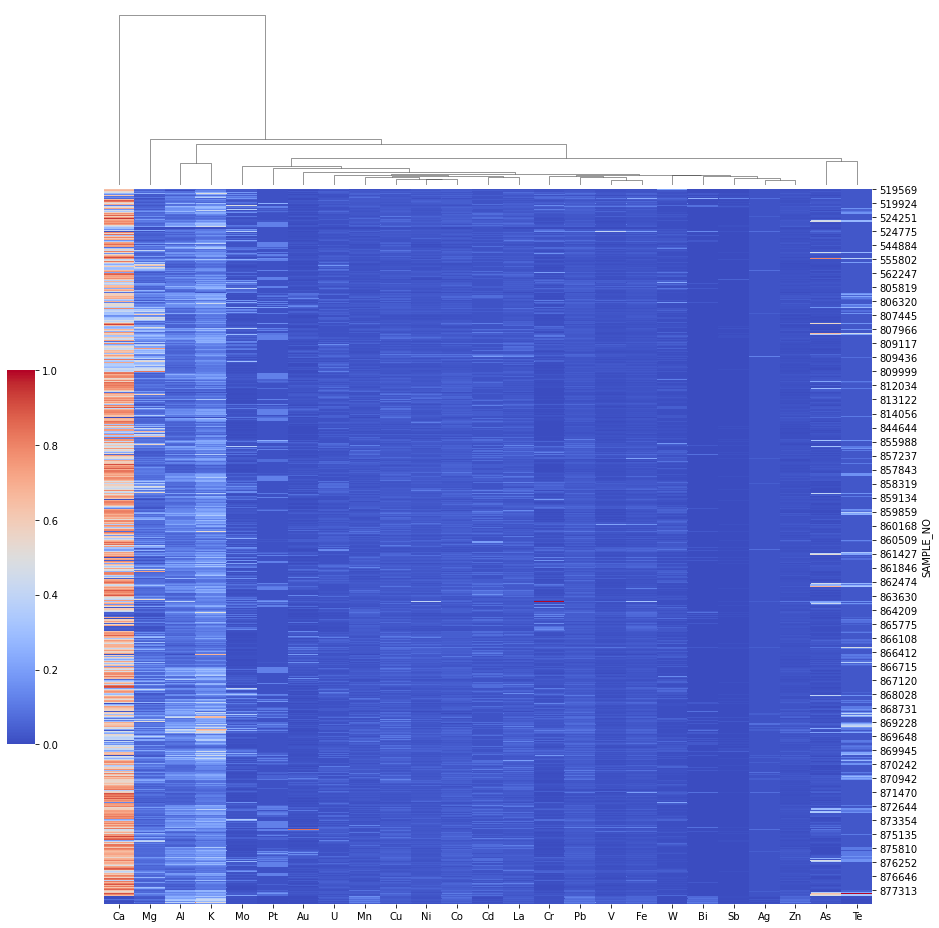

In [21]:
sns.clustermap(soil_chem_vf,
               row_cluster=False,
               dendrogram_ratio=(.1, .2),
               cbar_pos=(0, .2, .03, .4),
               standard_scale=1,
               cmap='coolwarm',
               figsize=(13,13))

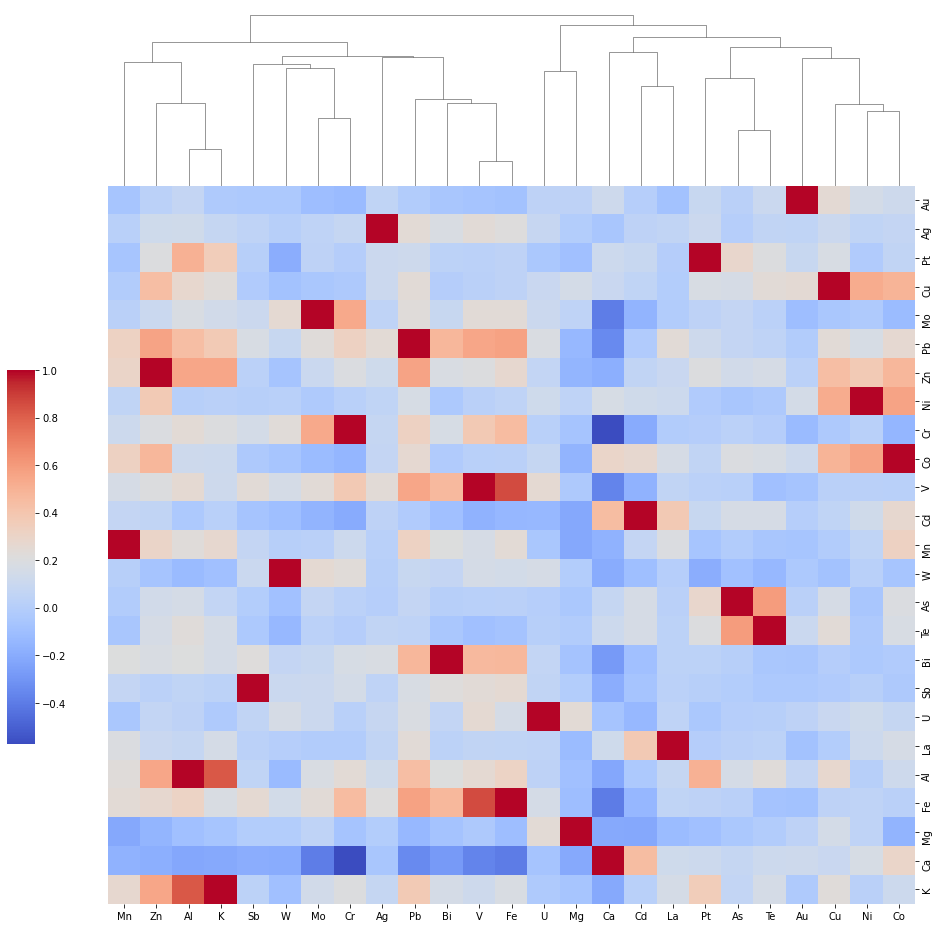

In [22]:
sns.clustermap(soil_chemcorr,
               row_cluster=False,
               dendrogram_ratio=(.1, .2),
               cbar_pos=(0, .2, .03, .4),
               cmap='coolwarm',
               figsize=(13,13))

### Preparando os dados para realização de análise de componentes principais (PCA)

PCA é uma técnica de aprendizado não-supervisionado de redução de dimensionalidade dos dados, que mapeia os eixos de maior variância dos dados (eigenvalues), reduzindo o número de variáveis que explicam a distribuição dos dados.

Elementos com valores de maior magnitude vão naturalmente adquirir pesos maiores na determinação dos componentes principais, causando enviesamento estatístico (bias). Para evitar esse problema, as concentrações devem ser normalizadas. O método mais recomendado na literatura para dados geoquímicos é o clr (center log ratio) transform, realizado na sequência.

In [23]:
from scipy.stats import gmean

In [24]:
soil_chem_clr = pd.DataFrame(np.nan,index=soil_chem_vf.index,columns=soil_chem_vf.columns)

In [25]:
soil_chem_clr.head()

,Au,Ag,Pt,Cu,Mo,Pb,Zn,Ni,Cr,Co,...,Te,Bi,Sb,U,La,Al,Fe,Mg,Ca,K
SAMPLE_NO,,,,,,,,,,,,,,,,,,,,,
519569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
soil_chem_clr['Au'] = np.log(soil_chem_vf['Au']/(gmean(soil_chem_vf['Au'])))
soil_chem_clr['Ag'] = np.log(soil_chem_vf['Ag']/(gmean(soil_chem_vf['Ag'])))
soil_chem_clr['Pt'] = np.log(soil_chem_vf['Pt']/(gmean(soil_chem_vf['Pt'])))
soil_chem_clr['Cu'] = np.log(soil_chem_vf['Cu']/(gmean(soil_chem_vf['Cu'])))
soil_chem_clr['Mo'] = np.log(soil_chem_vf['Mo']/(gmean(soil_chem_vf['Mo'])))
soil_chem_clr['Pb'] = np.log(soil_chem_vf['Pb']/(gmean(soil_chem_vf['Pb'])))
soil_chem_clr['Zn'] = np.log(soil_chem_vf['Zn']/(gmean(soil_chem_vf['Zn'])))
soil_chem_clr['Ni'] = np.log(soil_chem_vf['Ni']/(gmean(soil_chem_vf['Ni'])))
soil_chem_clr['Cr'] = np.log(soil_chem_vf['Cr']/(gmean(soil_chem_vf['Cr'])))
soil_chem_clr['Co'] = np.log(soil_chem_vf['Co']/(gmean(soil_chem_vf['Co'])))
soil_chem_clr['V'] = np.log(soil_chem_vf['V']/(gmean(soil_chem_vf['V'])))
soil_chem_clr['Cd'] = np.log(soil_chem_vf['Cd']/(gmean(soil_chem_vf['Cd'])))
soil_chem_clr['Mn'] = np.log(soil_chem_vf['Mn']/(gmean(soil_chem_vf['Mn'])))
soil_chem_clr['W'] = np.log(soil_chem_vf['W']/(gmean(soil_chem_vf['W'])))
soil_chem_clr['As'] = np.log(soil_chem_vf['As']/(gmean(soil_chem_vf['As'])))
soil_chem_clr['Te'] = np.log(soil_chem_vf['Te']/(gmean(soil_chem_vf['Te'])))
soil_chem_clr['Bi'] = np.log(soil_chem_vf['Bi']/(gmean(soil_chem_vf['Bi'])))
soil_chem_clr['Sb'] = np.log(soil_chem_vf['Sb']/(gmean(soil_chem_vf['Sb'])))
soil_chem_clr['U'] = np.log(soil_chem_vf['U']/(gmean(soil_chem_vf['U'])))
soil_chem_clr['La'] = np.log(soil_chem_vf['La']/(gmean(soil_chem_vf['La'])))
soil_chem_clr['Al'] = np.log(soil_chem_vf['Al']/(gmean(soil_chem_vf['Al'])))
soil_chem_clr['Fe'] = np.log(soil_chem_vf['Fe']/(gmean(soil_chem_vf['Fe'])))
soil_chem_clr['Mg'] = np.log(soil_chem_vf['Mg']/(gmean(soil_chem_vf['Mg'])))
soil_chem_clr['Ca'] = np.log(soil_chem_vf['Ca']/(gmean(soil_chem_vf['Ca'])))
soil_chem_clr['K'] = np.log(soil_chem_vf['K']/(gmean(soil_chem_vf['K'])))

### Checando os dados transformados para escala logarítmica e mapeamento de clusters sobre os dados transformados

Agora os dados estão padronizados para uma escala semelhante.

O mapa de clusters continua sem trazer nenhum resultado tangível.

In [27]:
soil_chem_clr.head()

,Au,Ag,Pt,Cu,Mo,Pb,Zn,Ni,Cr,Co,...,Te,Bi,Sb,U,La,Al,Fe,Mg,Ca,K
SAMPLE_NO,,,,,,,,,,,,,,,,,,,,,
519569,-0.273606,-0.031671,-0.551077,-0.696998,-0.061646,-0.223598,-0.462868,0.299371,0.135508,-0.361349,...,-0.369941,-0.084186,-0.343333,-0.152310,0.179957,-0.455055,0.002447,-0.406402,0.454971,-0.216230
519570,-0.273606,-0.031671,-0.551077,0.293401,0.226036,-0.446741,-0.175186,0.299371,0.135508,-0.053048,...,-0.369941,-0.084186,-0.343333,0.204365,-0.823345,-0.386062,-0.179875,0.840851,0.080888,-0.427539
519571,0.237220,-0.031671,-0.551077,-0.003850,0.449179,-0.446741,-0.175186,0.453522,-0.018642,-0.053048,...,-0.369941,0.608961,-0.343333,-0.152310,-0.600201,-0.455055,-0.020026,0.395944,0.283330,-0.488164
519572,-0.679071,-0.031671,-0.551077,-0.622890,-0.243968,-0.446741,-0.580651,0.353438,-0.424107,0.149476,...,-0.369941,-0.084186,-0.343333,-0.488782,-0.053658,-0.696217,-0.419826,-0.550983,0.487977,-0.427539
519573,0.237220,-0.031671,-0.551077,-0.553897,1.282088,-0.041276,-0.580651,0.181588,0.674505,-0.032845,...,-0.369941,-0.084186,-0.343333,-0.018778,-0.600201,-0.088430,0.298427,-0.280108,0.071084,-0.552702


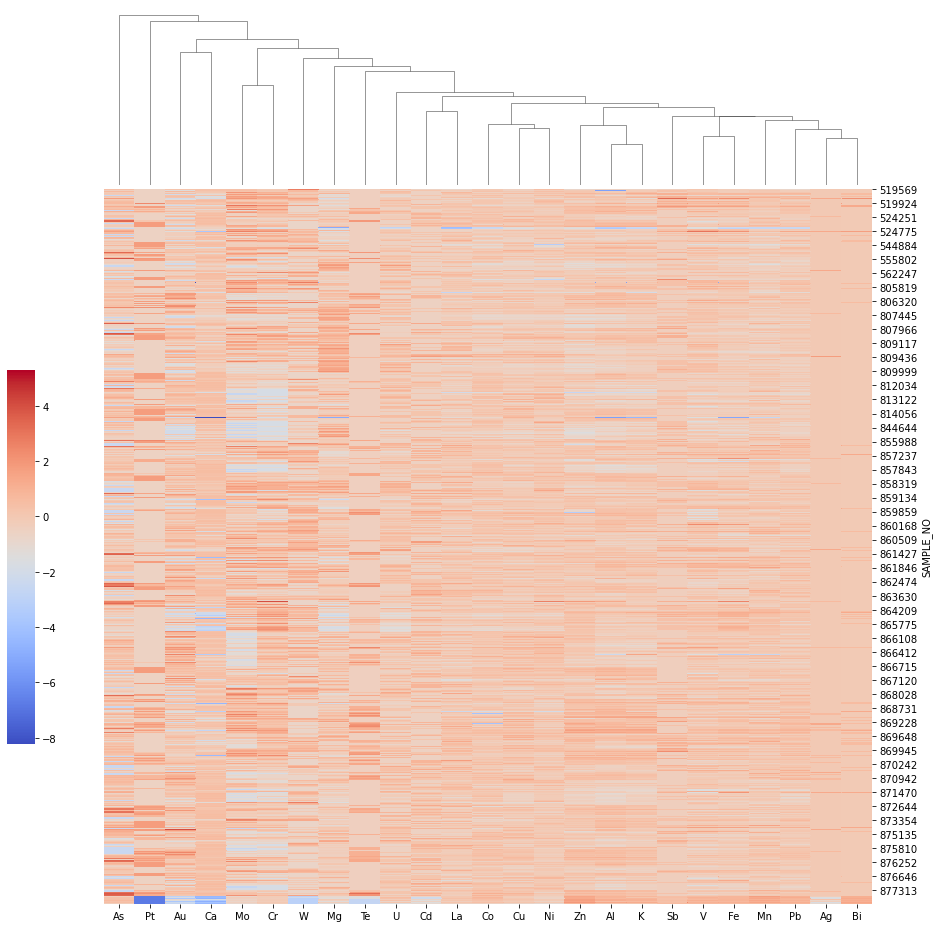

In [28]:
sns.clustermap(soil_chem_clr,
               row_cluster=False,
               dendrogram_ratio=(.1, .2),
               cbar_pos=(0, .2, .03, .4),
               cmap='coolwarm',
               figsize=(13,13))

### Análise de Componentes Principais (PCA)

No diagrama abaixo de variância cumulativa, constata-se que os 6 primeiros componentes principais respondem por 75% da distribuição dos valores dos elementos, o que comprova que os dados são estruturados.

Essa é uma inferência esperada para dados geoquímicos uma vez que sua distribuição é controlada pela mineralogia e, portanto, estequiometricamente condicionada.

In [29]:
from sklearn.decomposition import PCA

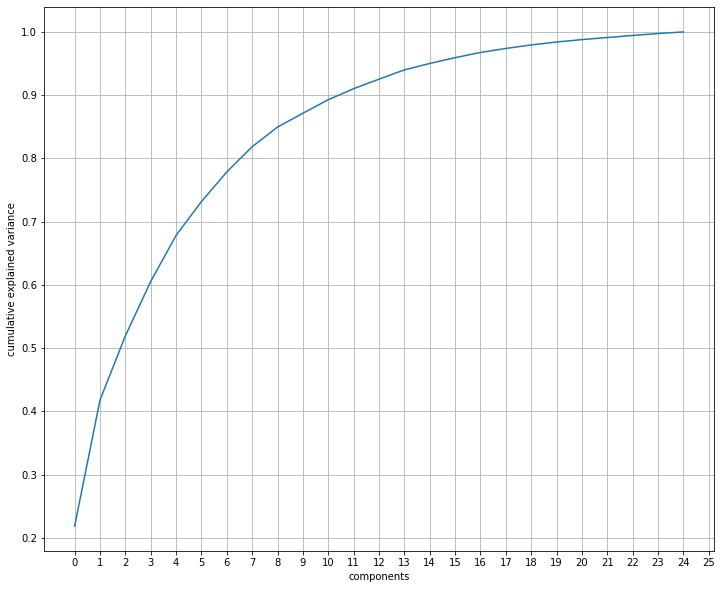

In [428]:
plt.figure(figsize=(12,10))
pca = PCA().fit(soil_chem_clr)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('components')
plt.xticks(ticks=range(0,26))
plt.ylabel('cumulative explained variance')
plt.grid()

In [31]:
pca = PCA(n_components=6)

In [32]:
pca.fit(soil_chem_clr)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
scores = pca.transform(soil_chem_clr)

In [34]:
soil_chem_clr.shape

(15142, 25)

In [35]:
scores.shape

(15142, 6)

In [36]:
print(scores)

[[ 0.05040461  0.98630178 -0.49934084 -0.1763448   0.59368307  0.7576714 ]
 [ 0.08367128  0.30127866 -0.05928978 -1.22208876  1.0327408  -0.51094471]
 [ 0.09425869  0.17443811 -0.0984468  -1.25326629  0.78988216 -0.04758525]
 ...
 [ 2.12201386  3.92286117  4.67597112 -2.02115138 -2.90295134 -2.26454181]
 [ 2.74454137  4.11909644  4.90903044 -1.50258505 -3.17766138 -2.08263595]
 [ 4.83393994  5.70943288  5.63167979  0.24362891 -1.7006795  -1.87779416]]


### Criando uma tabela com os scores da transformação de variáveis

Os scores são os valores dos componentes principais que definem o padrão composicional da respectiva amostra.

In [37]:
pca_scores = pd.DataFrame(scores,index=soil_chem_clr.index,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

In [38]:
pca_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6
SAMPLE_NO,,,,,,
519569,0.050405,0.986302,-0.499341,-0.176345,0.593683,0.757671
519570,0.083671,0.301279,-0.059290,-1.222089,1.032741,-0.510945
519571,0.094259,0.174438,-0.098447,-1.253266,0.789882,-0.047585
519572,-0.459958,2.480025,-1.221412,0.981399,-0.140912,0.524941
519573,1.359732,-0.139912,-0.914803,-1.573889,1.218365,0.983346


In [39]:
pca.explained_variance_
# the actual eigenvalues (variance)

array([2.75713659, 2.51532119, 1.28115909, 1.08683577, 0.91957745,
       0.67435128])

### Verificando quanto cada um dos 6 components principais explica a variância de distribuição

1º - 21,8%
2º - 19,9%
3º - 10,2%
4º - 8,6%
5º - 7,3%
6º - 5,3%

Os componentes principais que explicam menos a distribuição dos dados derivam de processos aleatórios e sub-amostragem.

In [40]:
pca.explained_variance_ratio_ 
# the percentage of the variance

array([0.21846801, 0.19930721, 0.10151556, 0.08611791, 0.07286482,
       0.05343376])

Enquantos os scores relacionam os PCs com as amostras, os componentes (ou loadings) relacionam os PCs com os elementos

In [41]:
pca.components_

array([[-3.41393401e-01, -1.41187270e-04, -2.26917315e-01,
        -7.80792593e-02,  4.47176613e-01,  1.50208127e-01,
         7.09785535e-02, -6.53938803e-02,  4.26056685e-01,
        -8.90210781e-02,  2.48148798e-01, -1.36845529e-01,
         8.02521387e-02,  1.45392812e-01, -1.02621469e-02,
        -1.14481183e-01,  9.29884838e-02,  1.60578330e-01,
         3.34031489e-03,  1.36342142e-02,  9.01533161e-02,
         2.35079689e-01, -1.20543959e-01, -4.06752584e-01,
         7.40051650e-02],
       [-2.53891062e-01, -3.37913512e-02, -5.15542424e-01,
        -1.40290456e-01, -3.09455556e-01, -9.45157727e-02,
        -1.61332683e-01, -2.42110442e-02, -2.25799359e-01,
        -6.50246967e-02, -5.10832887e-02, -4.38824341e-02,
        -1.62238279e-02,  4.45756315e-02, -5.28679386e-01,
        -2.75955229e-01,  2.14570851e-03, -2.11380306e-03,
        -3.29433193e-02, -3.62249427e-02, -2.33824471e-01,
        -7.42310580e-02, -4.38067145e-02, -1.17081950e-01,
        -1.47484407e-01],
    

In [69]:
# dataframe where the rows are the principal components and the columns the original features
pca_loadings = pd.DataFrame(pca.components_,index=['PC1','PC2','PC3','PC4','PC5','PC6'],columns=soil_chem_clr.columns)

In [70]:
pca_loadings.loc['PC1']

Au   -0.341393
Ag   -0.000141
Pt   -0.226917
Cu   -0.078079
Mo    0.447177
Pb    0.150208
Zn    0.070979
Ni   -0.065394
Cr    0.426057
Co   -0.089021
V     0.248149
Cd   -0.136846
Mn    0.080252
W     0.145393
As   -0.010262
Te   -0.114481
Bi    0.092988
Sb    0.160578
U     0.003340
La    0.013634
Al    0.090153
Fe    0.235080
Mg   -0.120544
Ca   -0.406753
K     0.074005
Name: PC1, dtype: float64

### Score plot

Plotando os scores da distribuição em um gráfico onde o eixo x é o 1º PC e o eixo y é o 2º PC.

O gráfico à direita mostra a distribuição dos elementos e como eles se relacionam aos componentes principais. Por exemplo, Mo está associado a valores positivos de PC1 e negativos de PC2.

In [44]:
from adjustText import adjust_text

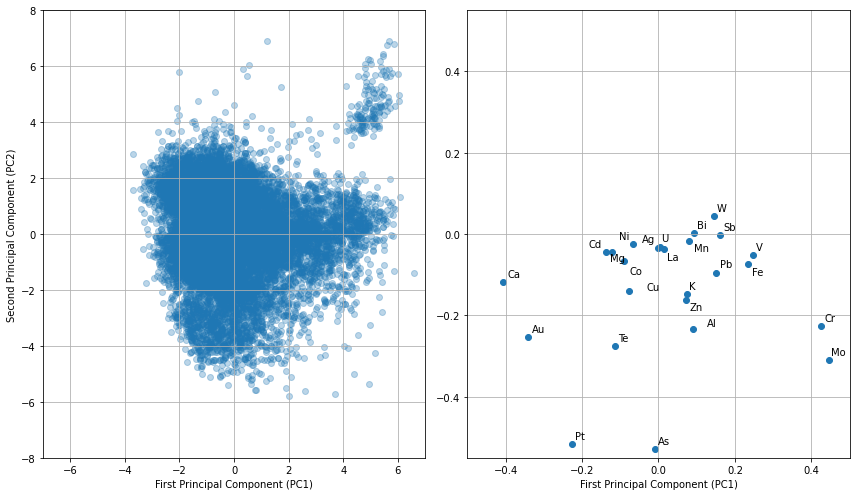

In [71]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=[12,7])

ax[0].scatter(scores[:,0],scores[:,1],marker='o',alpha=0.3)
ax[0].set_xlabel('First Principal Component (PC1)')
ax[0].set_ylabel('Second Principal Component (PC2)')
ax[0].set_xlim(-7,7)
ax[0].set_ylim(-8,8)
ax[0].grid()

ax[1].scatter(pca_loadings.loc['PC1'],pca_loadings.loc['PC2'])
ax[1].set_xlabel('First Principal Component (PC1)')
ax[1].set_xlim(-0.5,0.5)
ax[1].set_ylim(-0.55,0.55)
ax[1].grid()

txt = []
for i in range(0,25):
    txt.append(plt.text(pca_loadings.loc['PC1'][pca_loadings.columns[i]], pca_loadings.loc['PC2'][pca_loadings.columns[i]],
                        pca_loadings.columns[i]))

adjust_text(txt, x=list(pca_loadings.loc['PC1']), y=list(pca_loadings.loc['PC2']), ax=ax[1], fontsize=40,
            force_points=(0.2, 0.5), expand_points=(1.5,1.5))

plt.tight_layout()

In [72]:
txt

[Text(-0.3305101933490098, -0.24666410938396283, 'Au'),
 Text(-0.007542793453349601, -0.025716366682421422, 'Ag'),
 Text(-0.21880635523913794, -0.5083154711593936, 'Pt'),
 Text(-0.03177106726256914, -0.14196421776021, 'Cu'),
 Text(0.45130326026569845, -0.30222860329389983, 'Mo'),
 Text(0.16026987945290228, -0.08728882012094194, 'Pb'),
 Text(0.08186183169264283, -0.1685596355750316, 'Zn'),
 Text(-0.09095875761243968, -0.016984091646298605, 'Ni'),
 Text(0.4350916783431288, -0.21857240668460304, 'Cr'),
 Text(-0.07621825018841556, -0.07836703495772926, 'Co'),
 Text(0.25379572526429234, -0.04385633611756257, 'V'),
 Text(-0.1477285892928283, -0.036655481531324585, 'Cd'),
 Text(0.09257283723875948, -0.023450780499448903, 'Mn'),
 Text(0.15350377201181706, 0.0518025840459677, 'W'),
 Text(-0.00030284282289791653, -0.5214524332035646, 'As'),
 Text(-0.10595954195049842, -0.2687282766433598, 'Te'),
 Text(0.1009967730606876, 0.009372661103283905, 'Bi'),
 Text(0.1708454250027514, 0.005113149530766087

### Relação dos elementos químicos com os componentes principais

Os componentes principais da distribuição não se relacionam com as variáveis originais (elementos químicos) de forma direta, ou seja, o PC1 não é um elemento químico específico, mas na verdade uma combinação linear dos 25 elementos.

Esses diagramas mostram quantitativamente como cada elemento participa na composição dos componentes principais.

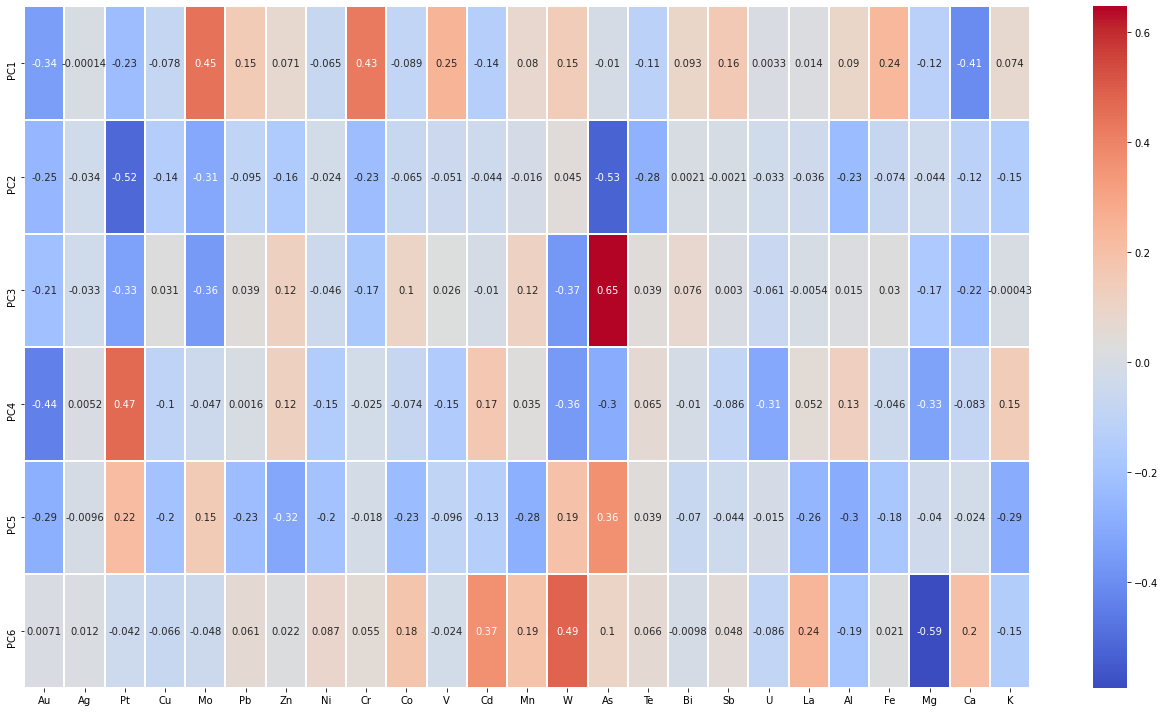

In [73]:
plt.figure(figsize=(18,10))
sns.heatmap(pca_loadings,annot=True,cmap='coolwarm',linecolor='white',linewidth=1)
plt.tight_layout()

In [74]:
pc1_sorted = pca_loadings.sort_values(by=['PC1'], axis=1, ascending=True)
pc2_sorted = pca_loadings.sort_values(by=['PC2'], axis=1, ascending=True)
pc3_sorted = pca_loadings.sort_values(by=['PC3'], axis=1, ascending=True)
pc4_sorted = pca_loadings.sort_values(by=['PC4'], axis=1, ascending=True)
pc5_sorted = pca_loadings.sort_values(by=['PC5'], axis=1, ascending=True)
pc6_sorted = pca_loadings.sort_values(by=['PC6'], axis=1, ascending=True)

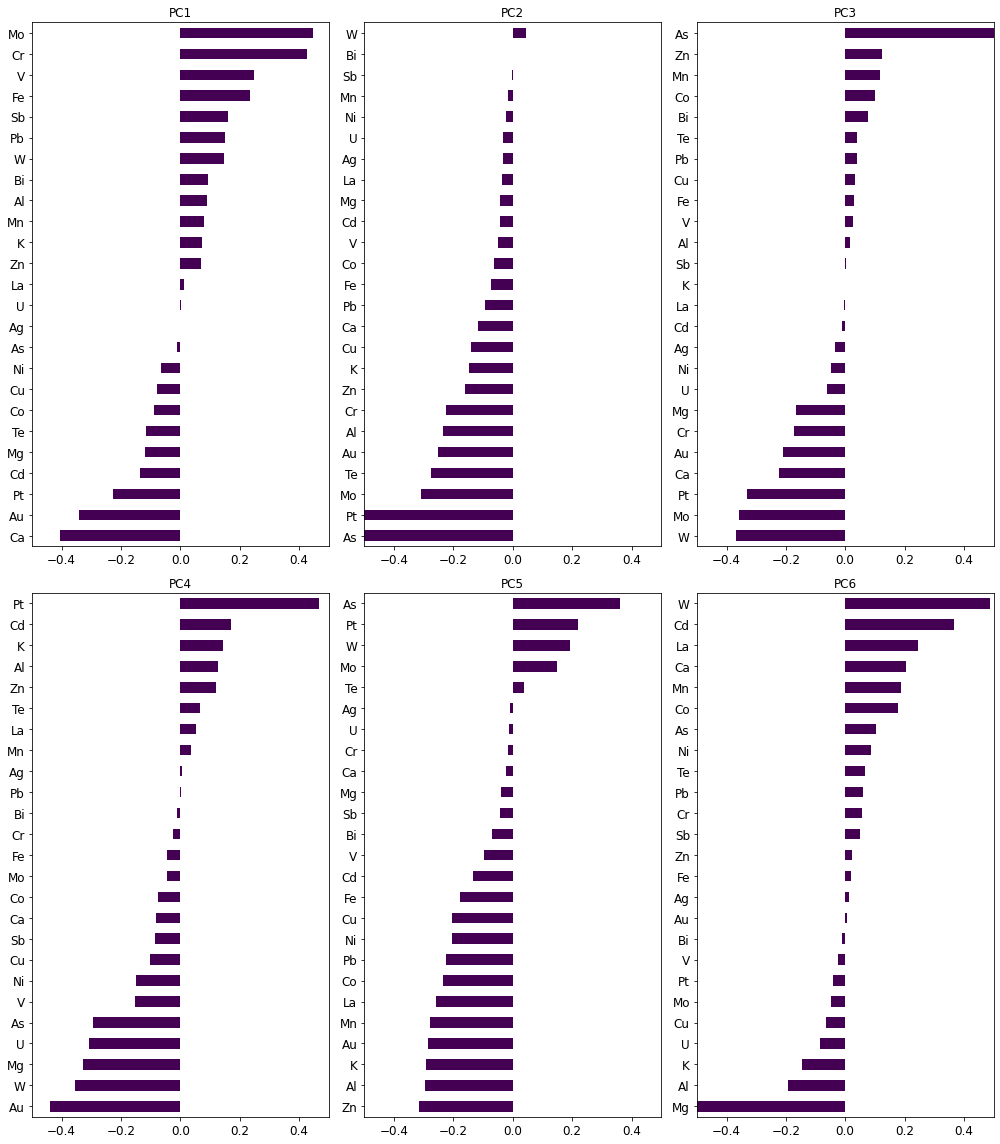

In [75]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=[14,16])
pc1_sorted.loc['PC1'].plot(kind='barh',title ="PC1",legend=False,fontsize=12,cmap='viridis',ax=ax[0,0])
ax[0,0].set_xlim(-0.5,0.5)
pc2_sorted.loc['PC2'].plot(kind='barh',title ="PC2",legend=False,fontsize=12,cmap='viridis',ax=ax[0,1])
ax[0,1].set_xlim(-0.5,0.5)
pc3_sorted.loc['PC3'].plot(kind='barh',title ="PC3",legend=False,fontsize=12,cmap='viridis',ax=ax[0,2])
ax[0,2].set_xlim(-0.5,0.5)
pc4_sorted.loc['PC4'].plot(kind='barh',title ="PC4",legend=False,fontsize=12,cmap='viridis',ax=ax[1,0])
ax[1,0].set_xlim(-0.5,0.5)
pc5_sorted.loc['PC5'].plot(kind='barh',title ="PC5",legend=False,fontsize=12,cmap='viridis',ax=ax[1,1])
ax[1,1].set_xlim(-0.5,0.5)
pc6_sorted.loc['PC6'].plot(kind='barh',title ="PC6",legend=False,fontsize=12,cmap='viridis',ax=ax[1,2])
ax[1,2].set_xlim(-0.5,0.5)
plt.tight_layout()

### Mapa de clusters dos scores e loadings

Também não me diz nada rs

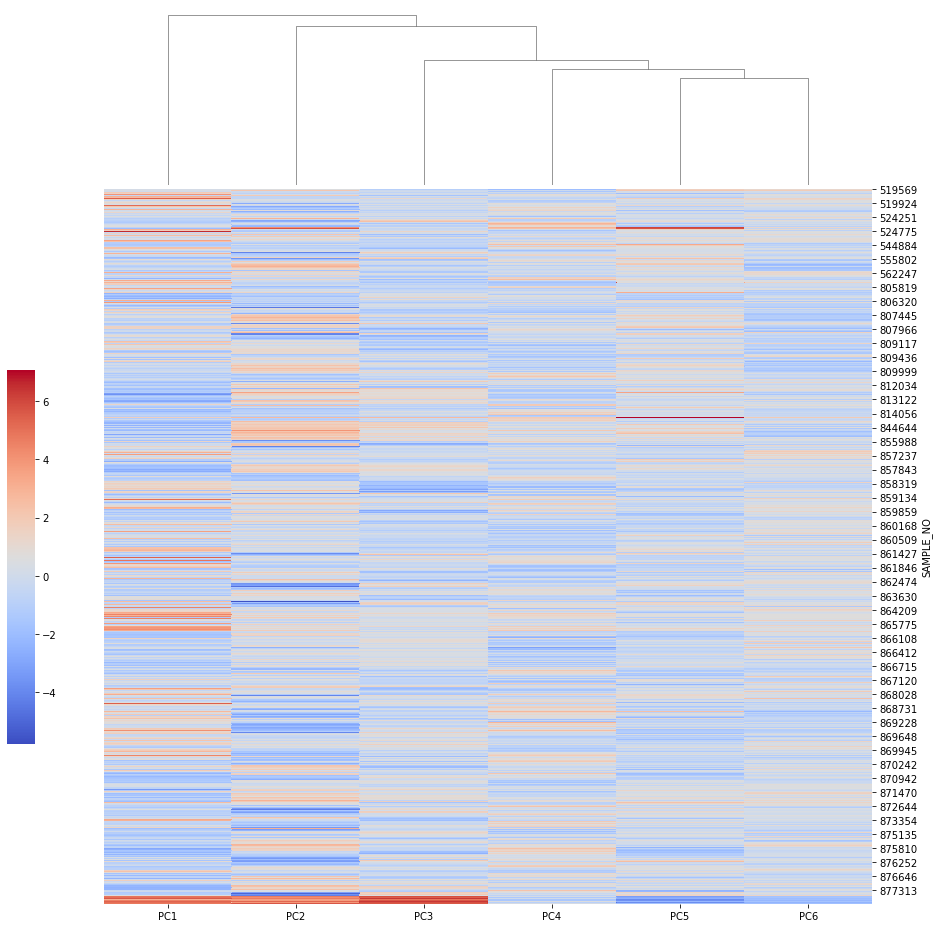

In [76]:
sns.clustermap(pca_scores,
               row_cluster=False,
               dendrogram_ratio=(.1, .2),
               cbar_pos=(0, .2, .03, .4),
               cmap='coolwarm',
               figsize=(13,13))

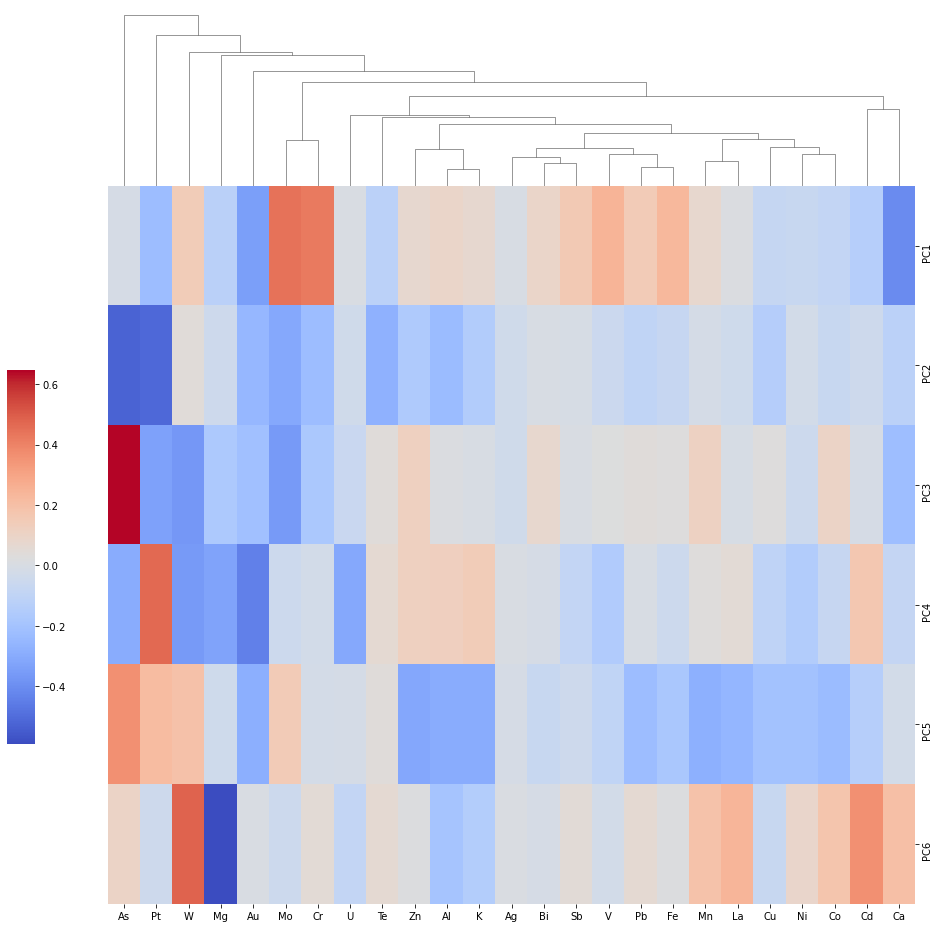

In [77]:
sns.clustermap(pca_loadings,
               row_cluster=False,
               dendrogram_ratio=(.1, .2),
               cbar_pos=(0, .2, .03, .4),
               cmap='coolwarm',
               figsize=(13,13))

### Concatenando os componentes principais com a tabela dos componentes químicos na escala original (não-logarítmica) e convertendo em dado geográfico

In [53]:
pca_map = pd.DataFrame(data=pca_scores,index=soil_chem_clr.index,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

In [54]:
pca_map.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], dtype='object')

In [55]:
soil_chem_subset.set_index('SAMPLE_NO',inplace=True)

In [56]:
soil_chem_subset.columns

Index(['Unnamed: 0', 'SAMPLE_SOURCE', 'DRILLHOLE_NUMBER', 'DH_NAME',
       'DH_DEPTH_FROM', 'DH_DEPTH_TO', 'SITE_NO', 'EASTING_GDA2020',
       'NORTHING_GDA2020', 'ZONE_GDA2020', 'LONGITUDE_GDA2020',
       'LATITUDE_GDA2020', 'CHEM_METHOD_CODE', 'CHEM_METHOD_DESC', 'geometry',
       'Au', 'Ag', 'Pt', 'Pd', 'Cu', 'Mo', 'Pb', 'Zn', 'Ni', 'Cr', 'Co', 'V',
       'Cd', 'Mn', 'Sn', 'W', 'Ta', 'Nb', 'Li', 'As', 'Te', 'Bi', 'Sb', 'F',
       'Cl', 'S', 'Ba', 'Sr', 'U', 'Zr', 'Ti', 'Y', 'Hf', 'La', 'Si', 'Al',
       'Fe', 'Mg', 'Ca', 'Na', 'K'],
      dtype='object')

In [57]:
pca_map = pd.concat([soil_chem_subset,pca_map], axis=1)

In [58]:
pca_map.drop('Unnamed: 0',axis=1,inplace=True)

In [59]:
pca_map.columns

Index(['SAMPLE_SOURCE', 'DRILLHOLE_NUMBER', 'DH_NAME', 'DH_DEPTH_FROM',
       'DH_DEPTH_TO', 'SITE_NO', 'EASTING_GDA2020', 'NORTHING_GDA2020',
       'ZONE_GDA2020', 'LONGITUDE_GDA2020', 'LATITUDE_GDA2020',
       'CHEM_METHOD_CODE', 'CHEM_METHOD_DESC', 'geometry', 'Au', 'Ag', 'Pt',
       'Pd', 'Cu', 'Mo', 'Pb', 'Zn', 'Ni', 'Cr', 'Co', 'V', 'Cd', 'Mn', 'Sn',
       'W', 'Ta', 'Nb', 'Li', 'As', 'Te', 'Bi', 'Sb', 'F', 'Cl', 'S', 'Ba',
       'Sr', 'U', 'Zr', 'Ti', 'Y', 'Hf', 'La', 'Si', 'Al', 'Fe', 'Mg', 'Ca',
       'Na', 'K', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
      dtype='object')

In [60]:
pca_map = gpd.GeoDataFrame(pca_map,geometry=gpd.points_from_xy(x=pca_map.LONGITUDE_GDA2020,y=pca_map.LATITUDE_GDA2020))

### Importando o shapefile dos depósitos minerais existentes

In [61]:
mindep = gpd.read_file(r"C:\Users\gabri\Gawler Challenge 2020\The SARIG Data Package Drilling, surface sample and observations\SARIG_Data_Package\Produtos v1\sarig_md_details_exp_clip.shp")

In [62]:
def find_Au(words):
    return 'gold' in words.lower().split()

def find_Ag(words):
    return 'silver' in words.lower().split()

def find_PGE(words):
    return 'Platinoids' in words.lower().split()

def find_Cu(words):
    return 'copper' in words.lower().split()

def find_Zn(words):
    return 'zinc' in words.lower().split()

def find_Ni(words):
    return 'nickel' in words.lower().split()

def find_Cr(words):
    return 'Chromium' in words.lower().split()

def find_U(words):
    return 'Uranium' in words.lower().split()

def find_Mn(words):
    return 'Manganese' in words.lower().split()

def find_Mo(words):
    return 'Molybdenum' in words.lower().split()

def find_V(words):
    return 'Vanadium' in words.lower().split()

In [63]:
mindep['Au'] = mindep['COMMODITIE'].apply(find_Au)
mindep['Ag'] = mindep['COMMODITIE'].apply(find_Ag)
mindep['PGE'] = mindep['COMMODITIE'].apply(find_PGE)
mindep['Cu'] = mindep['COMMODITIE'].apply(find_Cu)
mindep['Zn'] = mindep['COMMODITIE'].apply(find_Zn)
mindep['Ni'] = mindep['COMMODITIE'].apply(find_Ni)
mindep['Cr'] = mindep['COMMODITIE'].apply(find_Cr)
mindep['U'] = mindep['COMMODITIE'].apply(find_U)
mindep['Mn'] = mindep['COMMODITIE'].apply(find_Mn)
mindep['Mo'] = mindep['COMMODITIE'].apply(find_Mo)
mindep['V'] = mindep['COMMODITIE'].apply(find_V)

### Plotando as amostras no mapa com os respectivos valores de scores e sua interpolação

Mapas para os 3 primeiros componentes principais.

A esses mapas deverá ser adicionado o shapefile das unidades geológicas para determinar quais se associam com valores positivos e negativos dos componentes principais.

In [65]:
from scipy.interpolate import griddata

(-31.5, -29.0)

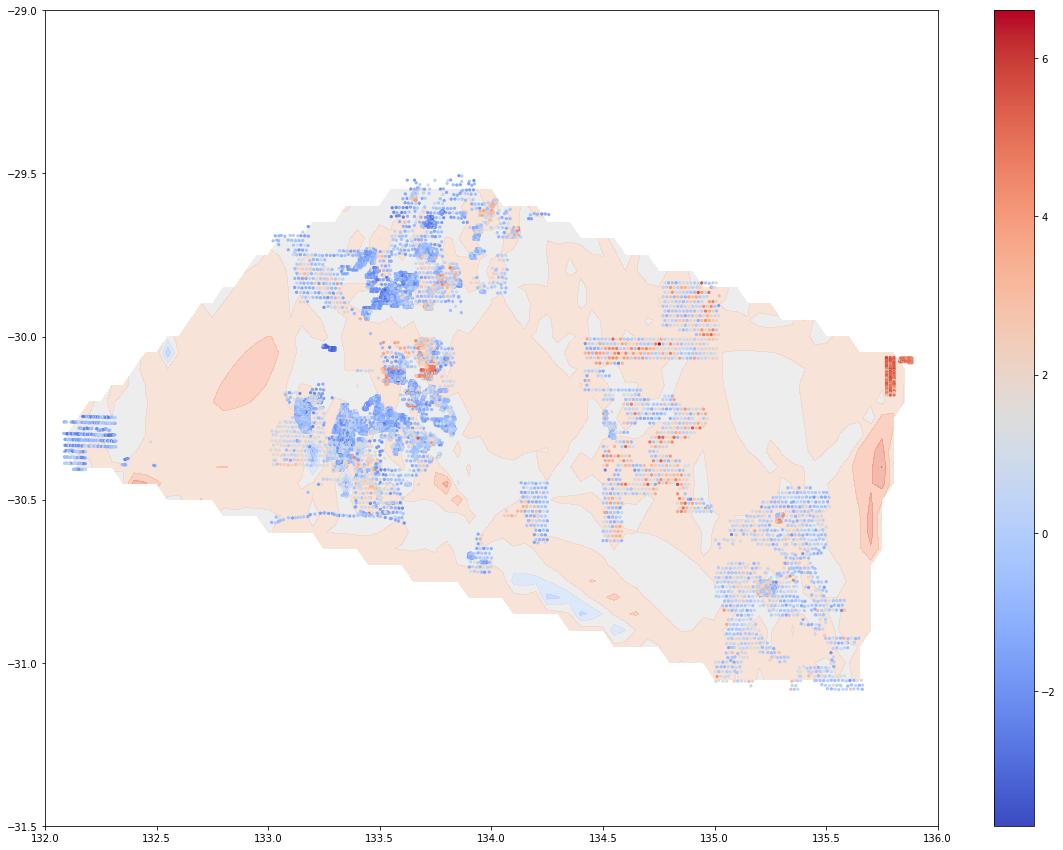

In [66]:
fig,ax = plt.subplots(figsize=[20,15])

xi = np.arange(132, 136, 0.05)
yi = np.arange(-31.5, -28.5, 0.05)
zi = griddata((pca_map["LONGITUDE_GDA2020"],pca_map["LATITUDE_GDA2020"]),pca_map["PC1"],(xi[None,:],yi[:,None]),method='cubic')

pca_contour = ax.contourf(xi,yi,zi,cmap='coolwarm',alpha=0.5)
pca_samples = ax.scatter(data=pca_map,x="LONGITUDE_GDA2020",y="LATITUDE_GDA2020",alpha=1,marker='o',c='PC1',s=5,cmap='coolwarm')
plt.colorbar(mappable=pca_samples)

ax.set_xlim(132,136)
ax.set_ylim(-31.5,-29)


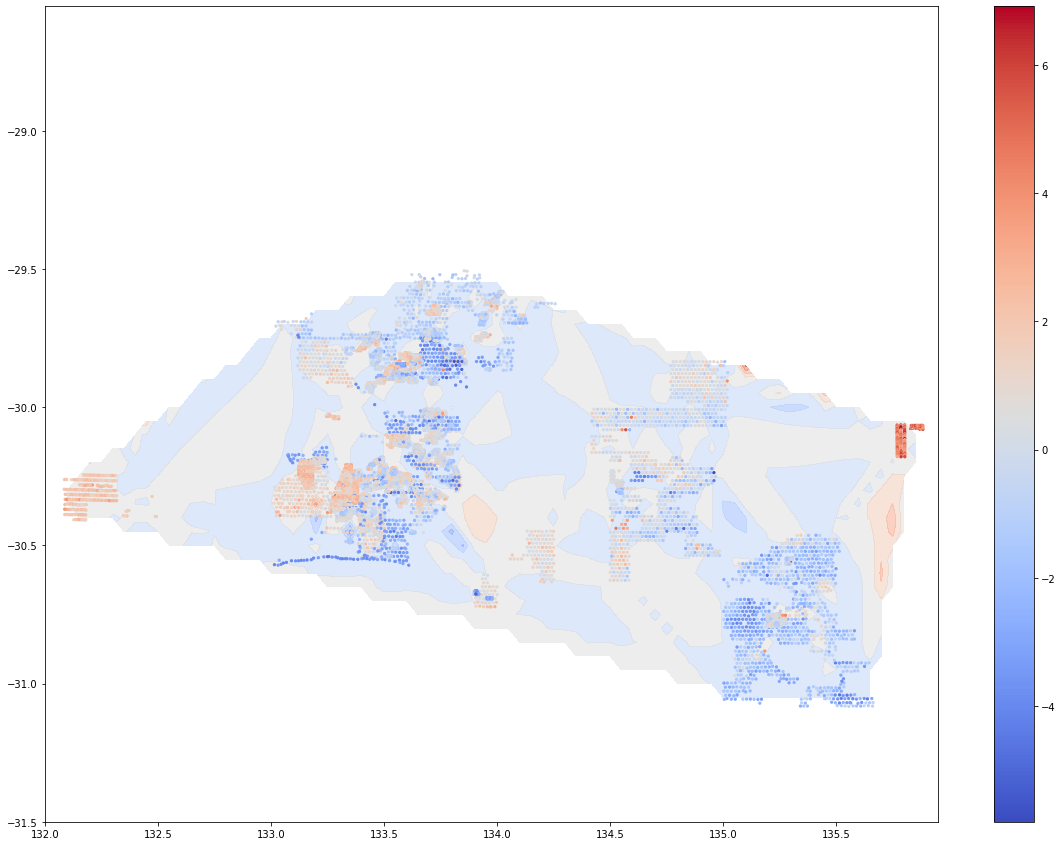

In [67]:
plt.figure(figsize=[20,15])
xi = np.arange(132, 136, 0.05)
yi = np.arange(-31.5, -28.5, 0.05)
zi = griddata((pca_map["LONGITUDE_GDA2020"],pca_map["LATITUDE_GDA2020"]),pca_map["PC2"],(xi[None,:],yi[:,None]),method='cubic')
plt.contourf(xi,yi,zi,cmap='coolwarm',alpha=0.5)
plt.scatter(data=pca_map,x="LONGITUDE_GDA2020",y="LATITUDE_GDA2020",alpha=1,marker='o',c='PC2',s=5,cmap='coolwarm')
plt.colorbar()

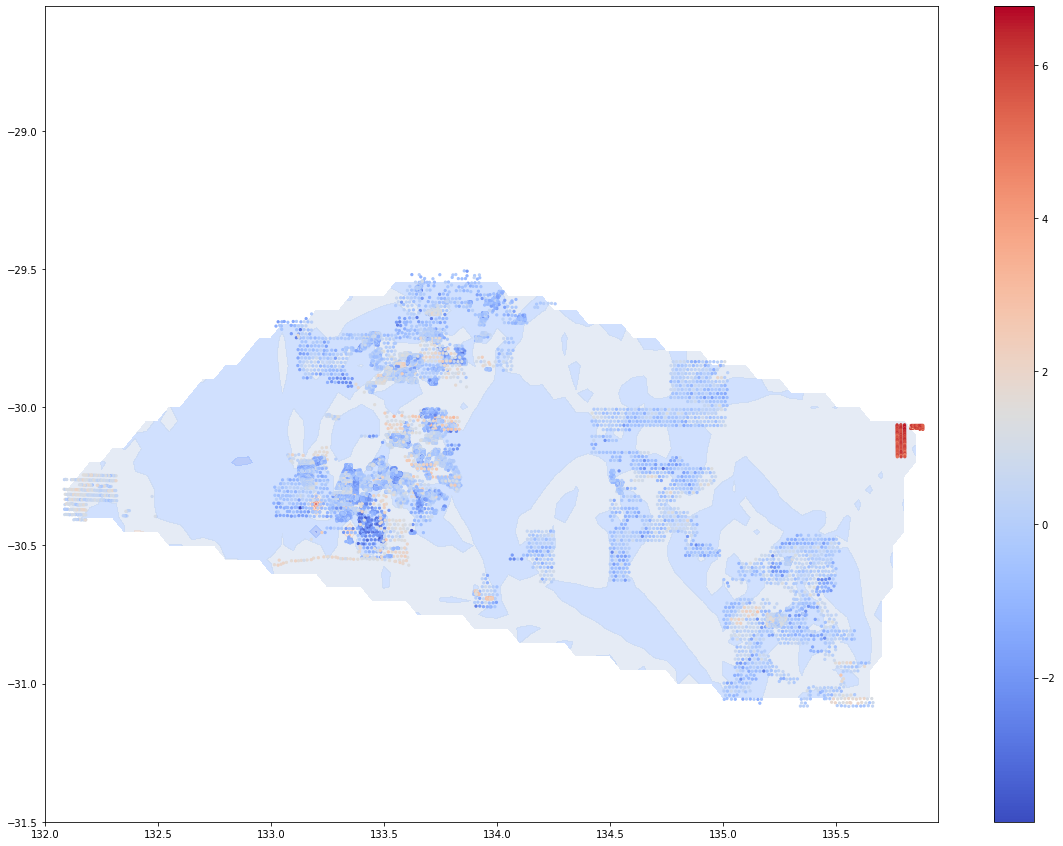

In [68]:
plt.figure(figsize=[20,15])
xi = np.arange(132, 136, 0.05)
yi = np.arange(-31.5, -28.5, 0.05)
zi = griddata((pca_map["LONGITUDE_GDA2020"],pca_map["LATITUDE_GDA2020"]),pca_map["PC3"],(xi[None,:],yi[:,None]),method='cubic')
plt.contourf(xi,yi,zi,cmap='coolwarm',alpha=0.5)
plt.scatter(data=pca_map,x="LONGITUDE_GDA2020",y="LATITUDE_GDA2020",alpha=1,marker='o',c='PC3',s=5,cmap='coolwarm')
plt.colorbar()

### Parte Final: Regressão Linear Múltipla sobre PCA, Determinação dos Resíduos e Definição de Alvos

A idéia aqui foi criar um modelo de machine learning que estimasse os valores de Au, Ag, Pt, Cu, Zn, Ni, Cr, U, Mo e V com base em uma regressão linear robusta baseada nos 6 componentes principais que respondem por mais de 70% da distribuição de valores dos elementos químicos.

Vale frisar que os primeiros componentes principais explicam as variações relacionadas a processos formadores de rocha (isto é, processos de abrangência regional). Processos mineralizantes são de escala local e, desse modo, invisíveis para esses mesmos componentes principais, contanto que a amostragem seja feita em escala regional. Amostragens feitas em escala de depósito obviamente vão revelar os processos mineralizantes na análise de PCA.

Desse modo, caso os valores estimados sejam semelhantes aos valores reais, isso significa que sua concentração pode ser explicada pelos componentes principais, ou seja, por processos normais de formação de rocha. Por outro lado, se houver uma diferença significativa (alto resíduo positivo), os processos regionais não conseguem explicar a concentração desse elemento, de modo que pode haver processos de natureza local (mineralizantes, por exemplo) que afetam a distribuição do elemento sob análise.

Portanto, os alvos foram definidos onde os resíduos da regressão linear se mostraram altos.

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lm = LinearRegression()

In [293]:
x = pca_map[['PC1','PC2','PC3','PC4','PC5','PC6']]
y_Au = pca_map['Au']*1000

In [294]:
x.head()

,PC1,PC2,PC3,PC4,PC5,PC6
SAMPLE_NO,,,,,,
519569,0.050405,0.986302,-0.499341,-0.176345,0.593683,0.757671
519570,0.083671,0.301279,-0.059290,-1.222089,1.032741,-0.510945
519571,0.094259,0.174438,-0.098447,-1.253266,0.789882,-0.047585
519572,-0.459958,2.480025,-1.221412,0.981399,-0.140912,0.524941
519573,1.359732,-0.139912,-0.914803,-1.573889,1.218365,0.983346


In [295]:
y_Au.head()

SAMPLE_NO
519569    3.0
519570    3.0
519571    5.0
519572    2.0
519573    5.0
Name: Au, dtype: float64

In [296]:
lm.fit(x,y_Au)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [297]:
lm.intercept_

6.54996697926298

In [298]:
lm.coef_

array([-1.76655433, -1.36681479, -0.77829775, -2.77367872, -2.22421786,
       -0.52672688])

In [299]:
pred_Au = lm.predict(x)

Text(0, 0.5, 'Predicted Au')

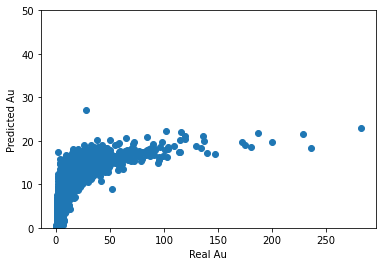

In [431]:
plt.scatter(y_Au,pred_Au)
plt.ylim(0,50)
plt.xlabel('Real Au')
plt.ylabel('Predicted Au')

In [301]:
residuals = y_Au - pred_Au

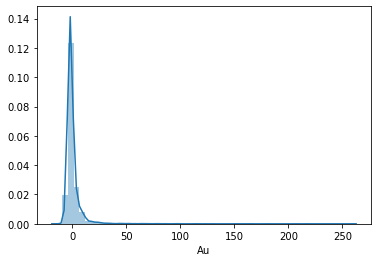

In [302]:
sns.distplot(residuals)

In [303]:
pca_map['Au_pred'] = pred_Au
pca_map['Au residuals'] = residuals

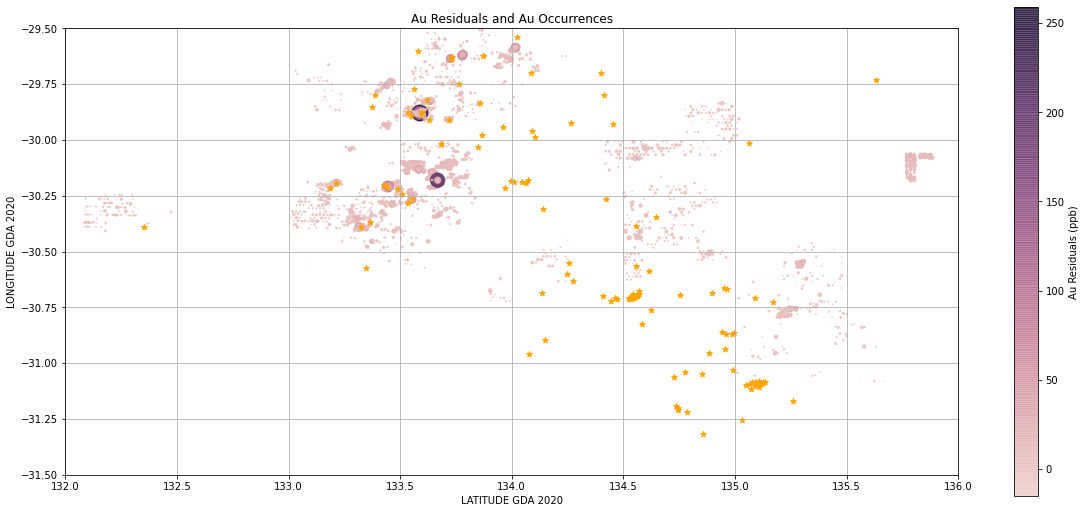

In [304]:
fig,ax = plt.subplots(figsize=[20,9])
cmap = sns.cubehelix_palette(as_cmap=True)
points = ax.scatter(x="LONGITUDE_GDA2020",y="LATITUDE_GDA2020",data=pca_map,c='Au residuals',s='Au residuals',
                     cmap=cmap,alpha=0.8,edgecolors=None)
fig.colorbar(points,label='Au Residuals (ppb)')
mindep[mindep['Au'] == True].plot(ax=ax,marker='*',color='orange',label='Au Occurrences')
ax.set_xlim(132,136)
ax.set_ylim(-31.5,-29.5)
ax.set_xlabel('LATITUDE GDA 2020')
ax.set_ylabel('LONGITUDE GDA 2020')
ax.set_title('Au Residuals and Au Occurrences')
ax.grid(True)

In [305]:
pca_map.to_csv('sarig_rs_chem_pca-lm_residuals.csv')

In [306]:
x = pca_map[['PC1','PC2','PC3','PC4','PC5','PC6']]
y_Ag = pca_map['Ag']*1000

In [307]:
lm.fit(x,y_Ag)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [308]:
pred_Ag = lm.predict(x)

Text(0, 0.5, 'Predicted Ag')

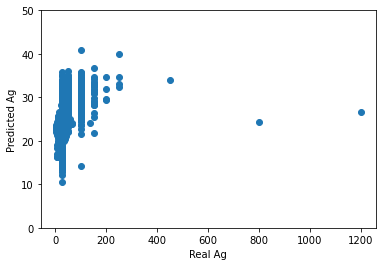

In [313]:
plt.scatter(y_Ag,pred_Ag)
plt.ylim(0,50)
plt.xlabel('Real Ag')
plt.ylabel('Predicted Ag')

In [314]:
residuals = y_Ag - pred_Ag

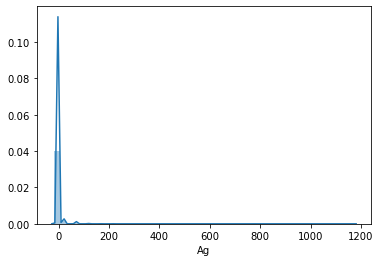

In [315]:
sns.distplot(residuals)

In [316]:
pca_map['Ag_pred'] = pred_Ag
pca_map['Ag residuals'] = residuals

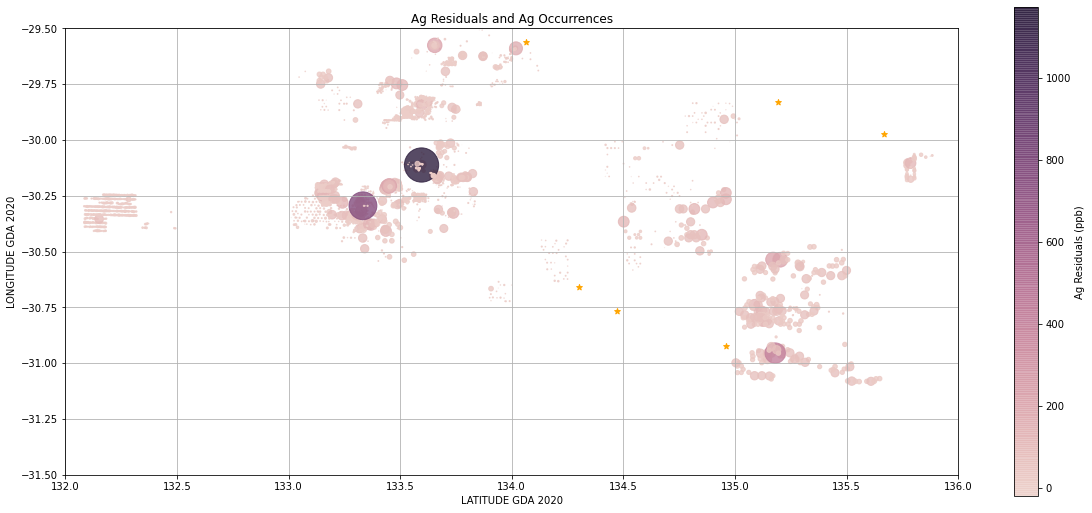

In [323]:
fig,ax = plt.subplots(figsize=[20,9])
cmap = sns.cubehelix_palette(as_cmap=True)
points = ax.scatter(x="LONGITUDE_GDA2020",y="LATITUDE_GDA2020",data=pca_map,c='Ag residuals',s='Ag residuals',
                     cmap=cmap,alpha=0.8,edgecolors=None)
fig.colorbar(points,label='Ag Residuals (ppb)')
mindep[mindep['Ag'] == True].plot(ax=ax,marker='*',color='orange',label='Ag Occurrences')
ax.set_xlim(132,136)
ax.set_ylim(-31.5,-29.5)
ax.set_xlabel('LATITUDE GDA 2020')
ax.set_ylabel('LONGITUDE GDA 2020')
ax.set_title('Ag Residuals and Ag Occurrences')
ax.grid(True)

In [327]:
x = pca_map[['PC1','PC2','PC3','PC4','PC5','PC6']]
y_Pt = pca_map['Pt']*1000

In [328]:
lm.fit(x,y_Pt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [329]:
pred_Pt = lm.predict(x)

Text(0, 0.5, 'Predicted Pt')

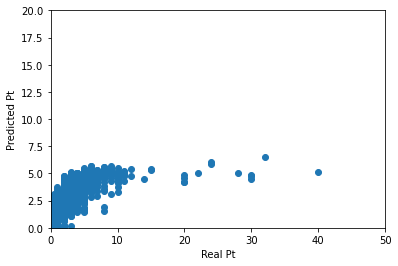

In [425]:
plt.scatter(y_Pt,pred_Pt)
plt.xlim(0,50)
plt.ylim(0,20)
plt.xlabel('Real Pt')
plt.ylabel('Predicted Pt')

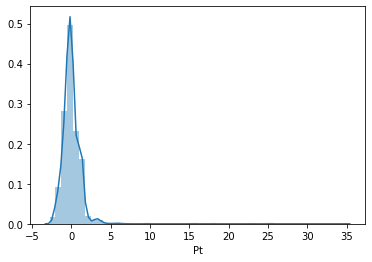

In [332]:
residuals = y_Pt - pred_Pt
sns.distplot(residuals)

In [333]:
pca_map['Pt_pred'] = pred_Pt
pca_map['Pt residuals'] = residuals

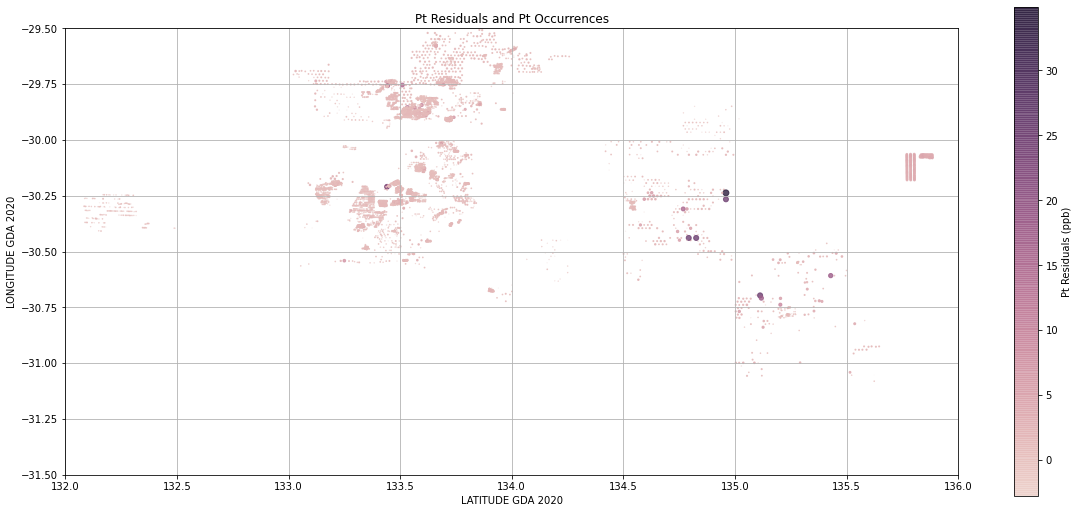

In [334]:
fig,ax = plt.subplots(figsize=[20,9])
cmap = sns.cubehelix_palette(as_cmap=True)
points = ax.scatter(x="LONGITUDE_GDA2020",y="LATITUDE_GDA2020",data=pca_map,c='Pt residuals',s='Pt residuals',
                     cmap=cmap,alpha=0.8,edgecolors=None)
fig.colorbar(points,label='Pt Residuals (ppb)')
mindep[mindep['PGE'] == True].plot(ax=ax,marker='*',color='orange',label='Pt Occurrences')
ax.set_xlim(132,136)
ax.set_ylim(-31.5,-29.5)
ax.set_xlabel('LATITUDE GDA 2020')
ax.set_ylabel('LONGITUDE GDA 2020')
ax.set_title('Pt Residuals and Pt Occurrences')
ax.grid(True)

In [335]:
x = pca_map[['PC1','PC2','PC3','PC4','PC5','PC6']]
y_Cu = pca_map['Cu']

In [337]:
lm.fit(x,y_Cu)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [338]:
pred_Cu = lm.predict(x)

Text(0, 0.5, 'Predicted Cu')

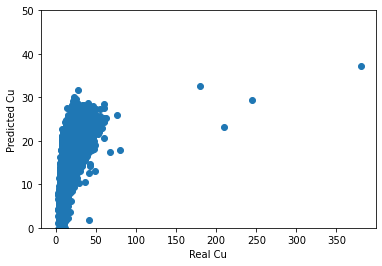

In [341]:
plt.scatter(y_Cu,pred_Cu)
plt.ylim(0,50)
plt.xlabel('Real Cu')
plt.ylabel('Predicted Cu')

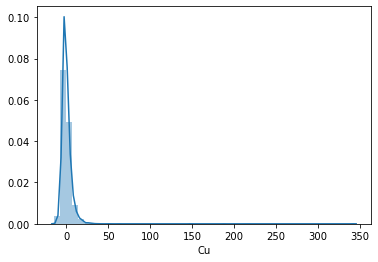

In [342]:
residuals = y_Cu - pred_Cu
sns.distplot(residuals)

In [343]:
pca_map['Cu_pred'] = pred_Cu
pca_map['Cu residuals'] = residuals

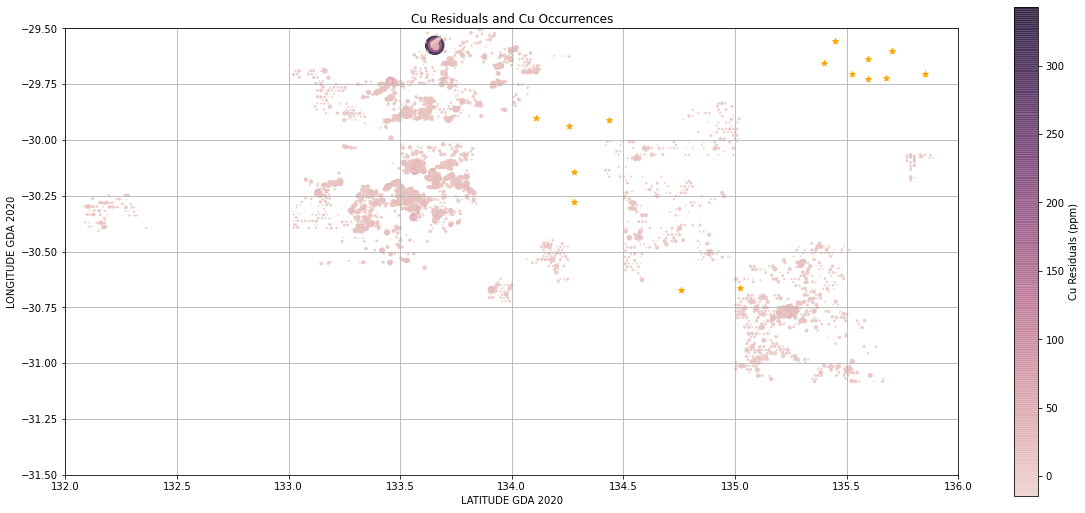

In [344]:
fig,ax = plt.subplots(figsize=[20,9])
cmap = sns.cubehelix_palette(as_cmap=True)
points = ax.scatter(x="LONGITUDE_GDA2020",y="LATITUDE_GDA2020",data=pca_map,c='Cu residuals',s='Cu residuals',
                     cmap=cmap,alpha=0.8,edgecolors=None)
fig.colorbar(points,label='Cu Residuals (ppm)')
mindep[mindep['Cu'] == True].plot(ax=ax,marker='*',color='orange',label='Cu Occurrences')
ax.set_xlim(132,136)
ax.set_ylim(-31.5,-29.5)
ax.set_xlabel('LATITUDE GDA 2020')
ax.set_ylabel('LONGITUDE GDA 2020')
ax.set_title('Cu Residuals and Cu Occurrences')
ax.grid(True)

In [345]:
x = pca_map[['PC1','PC2','PC3','PC4','PC5','PC6']]
y_Zn = pca_map['Zn']

In [346]:
lm.fit(x,y_Zn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [347]:
pred_Zn = lm.predict(x)

Text(0, 0.5, 'Predicted Zn')

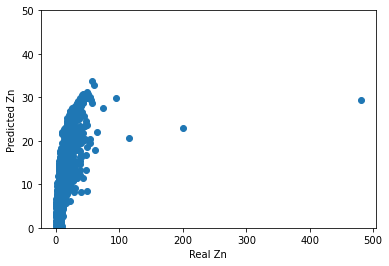

In [350]:
plt.scatter(y_Zn,pred_Zn)
plt.ylim(0,50)
plt.xlabel('Real Zn')
plt.ylabel('Predicted Zn')

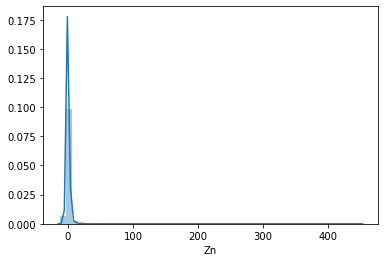

In [351]:
residuals = y_Zn - pred_Zn
sns.distplot(residuals)

In [352]:
pca_map['Zn_pred'] = pred_Zn
pca_map['Zn residuals'] = residuals

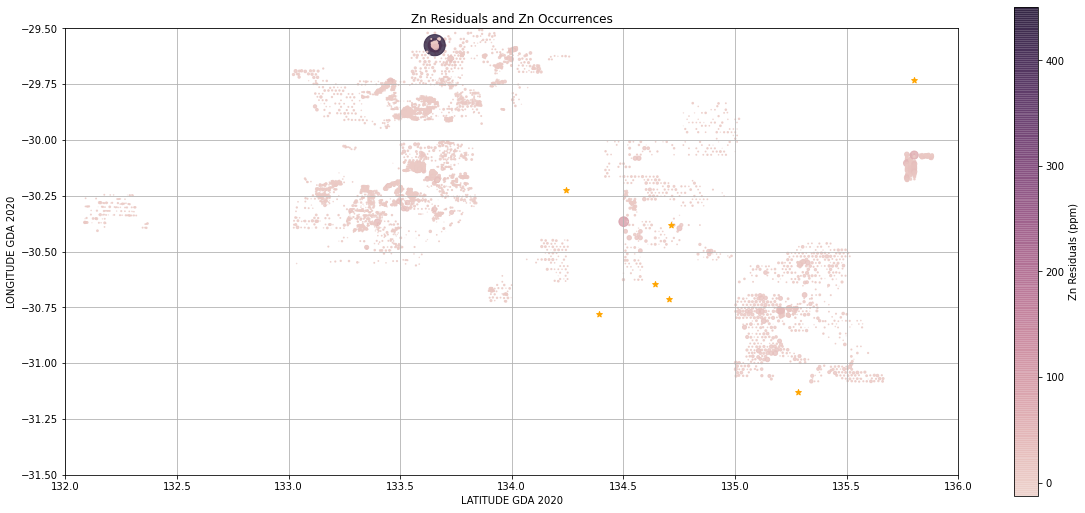

In [353]:
fig,ax = plt.subplots(figsize=[20,9])
cmap = sns.cubehelix_palette(as_cmap=True)
points = ax.scatter(x="LONGITUDE_GDA2020",y="LATITUDE_GDA2020",data=pca_map,c='Zn residuals',s='Zn residuals',
                     cmap=cmap,alpha=0.8,edgecolors=None)
fig.colorbar(points,label='Zn Residuals (ppm)')
mindep[mindep['Zn'] == True].plot(ax=ax,marker='*',color='orange',label='Zn Occurrences')
ax.set_xlim(132,136)
ax.set_ylim(-31.5,-29.5)
ax.set_xlabel('LATITUDE GDA 2020')
ax.set_ylabel('LONGITUDE GDA 2020')
ax.set_title('Zn Residuals and Zn Occurrences')
ax.grid(True)

In [354]:
x = pca_map[['PC1','PC2','PC3','PC4','PC5','PC6']]
y_Ni = pca_map['Ni']

In [355]:
lm.fit(x,y_Ni)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [356]:
pred_Ni = lm.predict(x)

Text(0, 0.5, 'Predicted Ni')

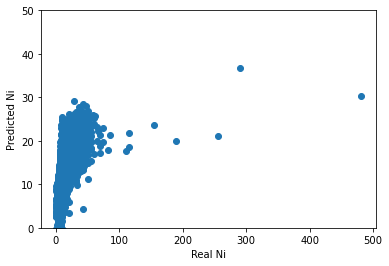

In [357]:
plt.scatter(y_Ni,pred_Ni)
plt.ylim(0,50)
plt.xlabel('Real Ni')
plt.ylabel('Predicted Ni')

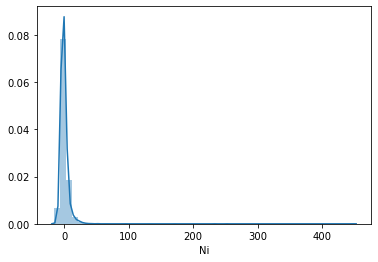

In [358]:
residuals = y_Ni - pred_Ni
sns.distplot(residuals)

In [361]:
pca_map['Ni_pred'] = pred_Ni
pca_map['Ni residuals'] = residuals

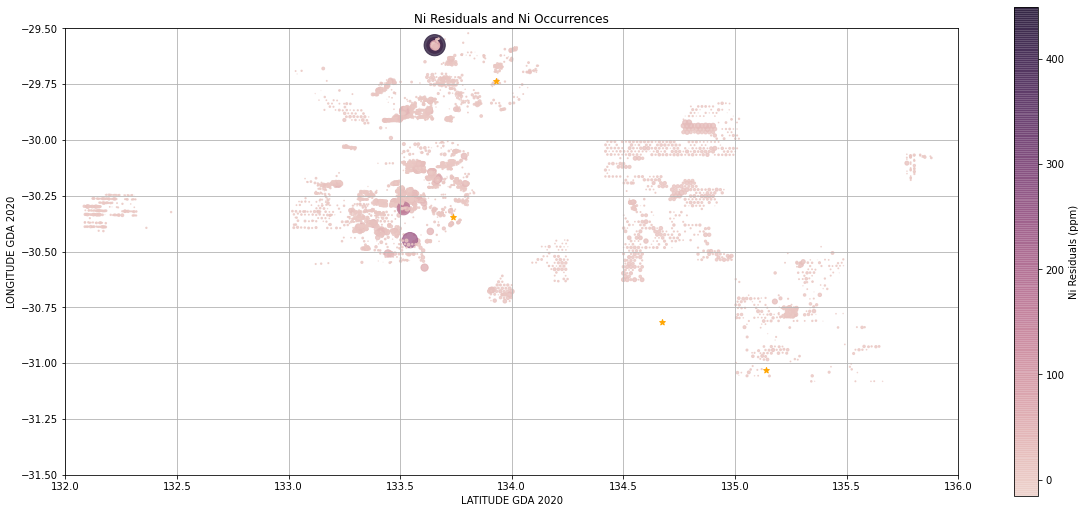

In [362]:
fig,ax = plt.subplots(figsize=[20,9])
cmap = sns.cubehelix_palette(as_cmap=True)
points = ax.scatter(x="LONGITUDE_GDA2020",y="LATITUDE_GDA2020",data=pca_map,c='Ni residuals',s='Ni residuals',
                     cmap=cmap,alpha=0.8,edgecolors=None)
fig.colorbar(points,label='Ni Residuals (ppm)')
mindep[mindep['Ni'] == True].plot(ax=ax,marker='*',color='orange',label='Ni Occurrences')
ax.set_xlim(132,136)
ax.set_ylim(-31.5,-29.5)
ax.set_xlabel('LATITUDE GDA 2020')
ax.set_ylabel('LONGITUDE GDA 2020')
ax.set_title('Ni Residuals and Ni Occurrences')
ax.grid(True)

In [363]:
x = pca_map[['PC1','PC2','PC3','PC4','PC5','PC6']]
y_Cr = pca_map['Cr']

In [364]:
lm.fit(x,y_Cr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [365]:
pred_Cr = lm.predict(x)

Text(0, 0.5, 'Predicted Cr')

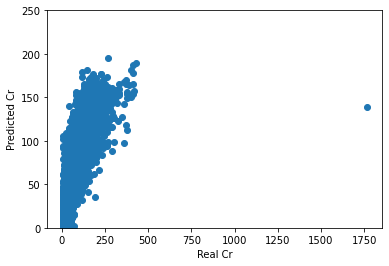

In [370]:
plt.scatter(y_Cr,pred_Cr)
plt.ylim(0,250)
plt.xlabel('Real Cr')
plt.ylabel('Predicted Cr')

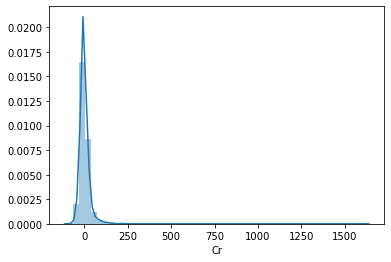

In [371]:
residuals = y_Cr - pred_Cr
sns.distplot(residuals)

In [372]:
pca_map['Cr_pred'] = pred_Cr
pca_map['Cr residuals'] = residuals

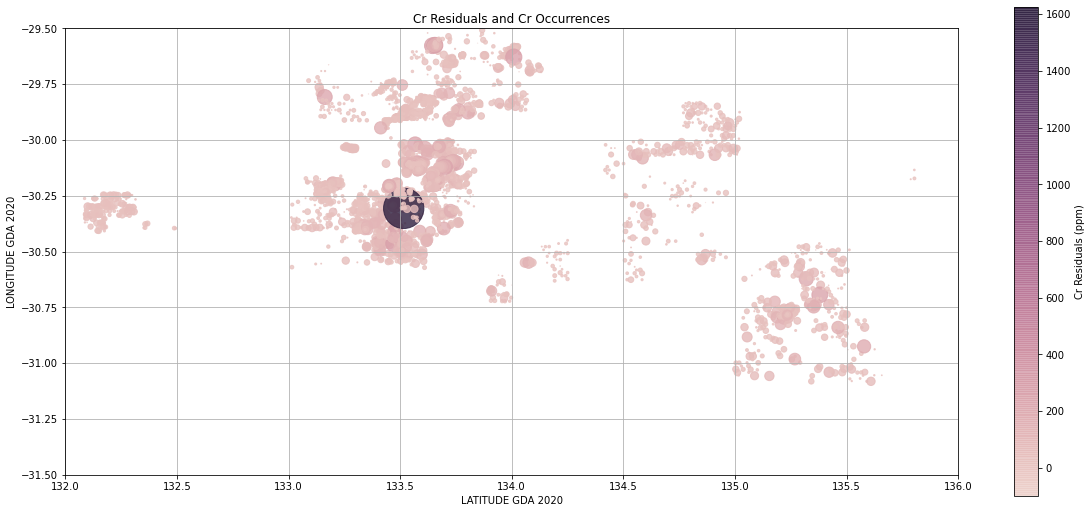

In [386]:
fig,ax = plt.subplots(figsize=[20,9])
cmap = sns.cubehelix_palette(as_cmap=True)
points = ax.scatter(x="LONGITUDE_GDA2020",y="LATITUDE_GDA2020",data=pca_map,c='Cr residuals',s='Cr residuals',
                     cmap=cmap,alpha=0.8,edgecolors=None)
fig.colorbar(points,label='Cr Residuals (ppm)')
mindep[mindep['Cr'] == True].plot(ax=ax,marker='*',color='orange',label='Cr Occurrences')
ax.set_xlim(132,136)
ax.set_ylim(-31.5,-29.5)
ax.set_xlabel('LATITUDE GDA 2020')
ax.set_ylabel('LONGITUDE GDA 2020')
ax.set_title('Cr Residuals and Cr Occurrences')
ax.grid(True)

In [374]:
x = pca_map[['PC1','PC2','PC3','PC4','PC5','PC6']]
y_U = pca_map['U']

In [375]:
lm.fit(x,y_U)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [376]:
pred_U = lm.predict(x)

Text(0, 0.5, 'Predicted U')

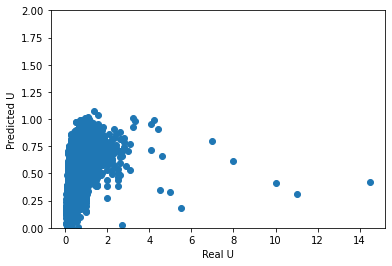

In [380]:
plt.scatter(y_U,pred_U)
plt.ylim(0,2)
plt.xlabel('Real U')
plt.ylabel('Predicted U')

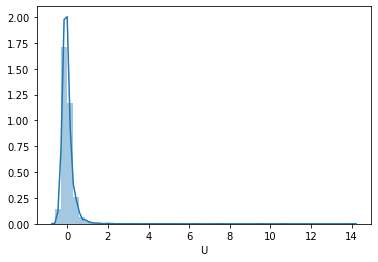

In [387]:
residuals = y_U - pred_U
sns.distplot(residuals)

In [388]:
pca_map['U_pred'] = pred_U
pca_map['U residuals'] = residuals

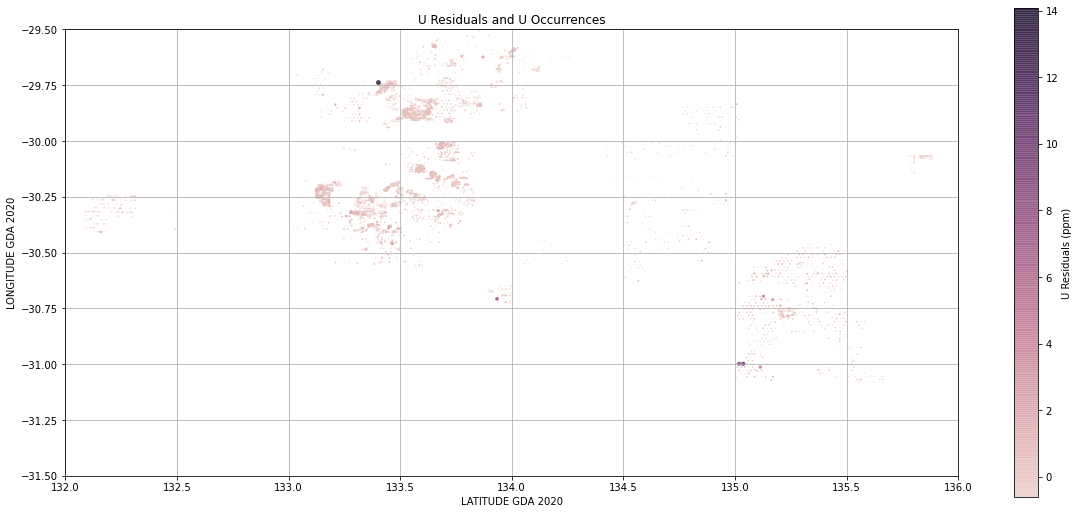

In [389]:
fig,ax = plt.subplots(figsize=[20,9])
cmap = sns.cubehelix_palette(as_cmap=True)
points = ax.scatter(x="LONGITUDE_GDA2020",y="LATITUDE_GDA2020",data=pca_map,c='U residuals',s='U residuals',
                     cmap=cmap,alpha=0.8,edgecolors=None)
fig.colorbar(points,label='U Residuals (ppm)')
mindep[mindep['U'] == True].plot(ax=ax,marker='*',color='orange',label='U Occurrences')
ax.set_xlim(132,136)
ax.set_ylim(-31.5,-29.5)
ax.set_xlabel('LATITUDE GDA 2020')
ax.set_ylabel('LONGITUDE GDA 2020')
ax.set_title('U Residuals and U Occurrences')
ax.grid(True)

In [397]:
x = pca_map[['PC1','PC2','PC3','PC4','PC5','PC6']]
y_Mo = pca_map['Mo']

In [398]:
lm.fit(x,y_Mo)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [399]:
pred_Mo = lm.predict(x)

Text(0, 0.5, 'Predicted Mo')

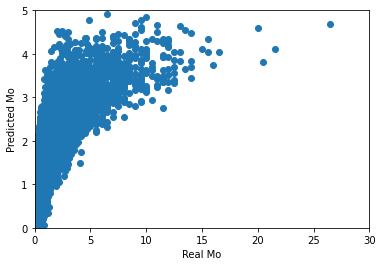

In [403]:
plt.scatter(y_Mo,pred_Mo)
plt.xlim(0,30)
plt.ylim(0,5)
plt.xlabel('Real Mo')
plt.ylabel('Predicted Mo')

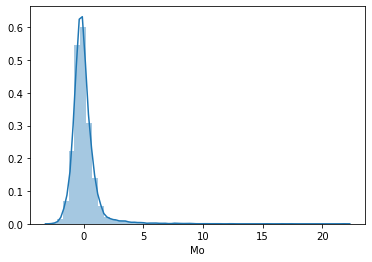

In [404]:
residuals = y_Mo - pred_Mo
sns.distplot(residuals)

In [409]:
pca_map['Mo_pred'] = pred_Mo
pca_map['Mo residuals'] = residuals

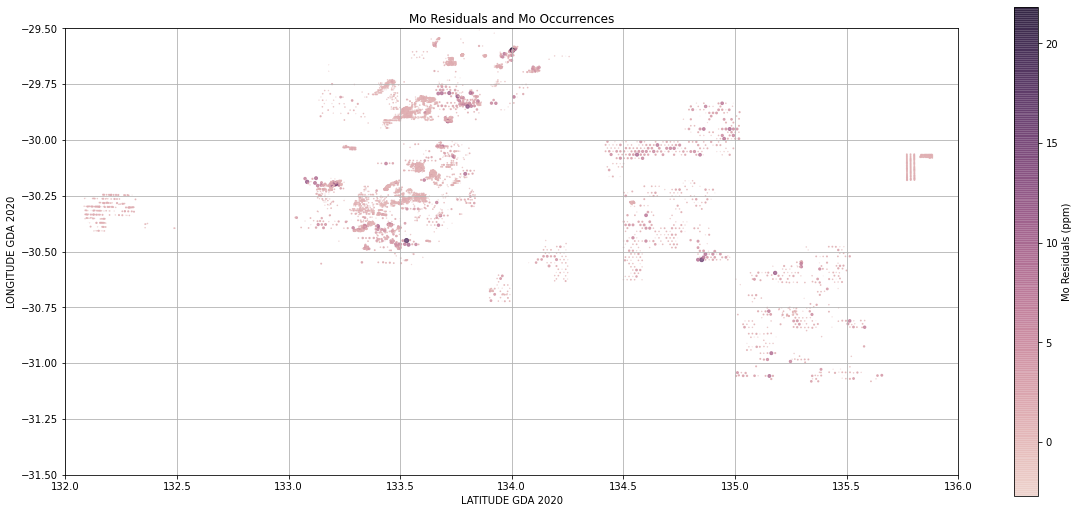

In [410]:
fig,ax = plt.subplots(figsize=[20,9])
cmap = sns.cubehelix_palette(as_cmap=True)
points = ax.scatter(x="LONGITUDE_GDA2020",y="LATITUDE_GDA2020",data=pca_map,c='Mo residuals',s='Mo residuals',
                     cmap=cmap,alpha=0.8,edgecolors=None)
fig.colorbar(points,label='Mo Residuals (ppm)')
mindep[mindep['Mo'] == True].plot(ax=ax,marker='*',color='orange',label='Mo Occurrences')
ax.set_xlim(132,136)
ax.set_ylim(-31.5,-29.5)
ax.set_xlabel('LATITUDE GDA 2020')
ax.set_ylabel('LONGITUDE GDA 2020')
ax.set_title('Mo Residuals and Mo Occurrences')
ax.grid(True)

In [411]:
x = pca_map[['PC1','PC2','PC3','PC4','PC5','PC6']]
y_V = pca_map['V']

In [412]:
lm.fit(x,y_V)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [413]:
pred_V = lm.predict(x)

Text(0, 0.5, 'Predicted V')

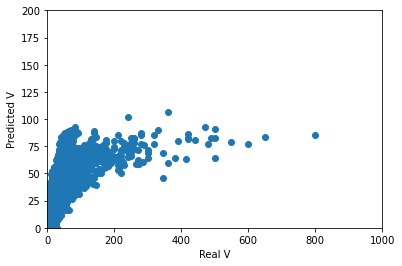

In [420]:
plt.scatter(y_V,pred_V)
plt.xlim(0,1000)
plt.ylim(0,200)
plt.xlabel('Real V')
plt.ylabel('Predicted V')

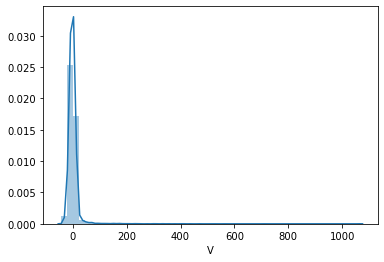

In [421]:
residuals = y_V - pred_V
sns.distplot(residuals)

In [422]:
pca_map['V_pred'] = pred_V
pca_map['V residuals'] = residuals

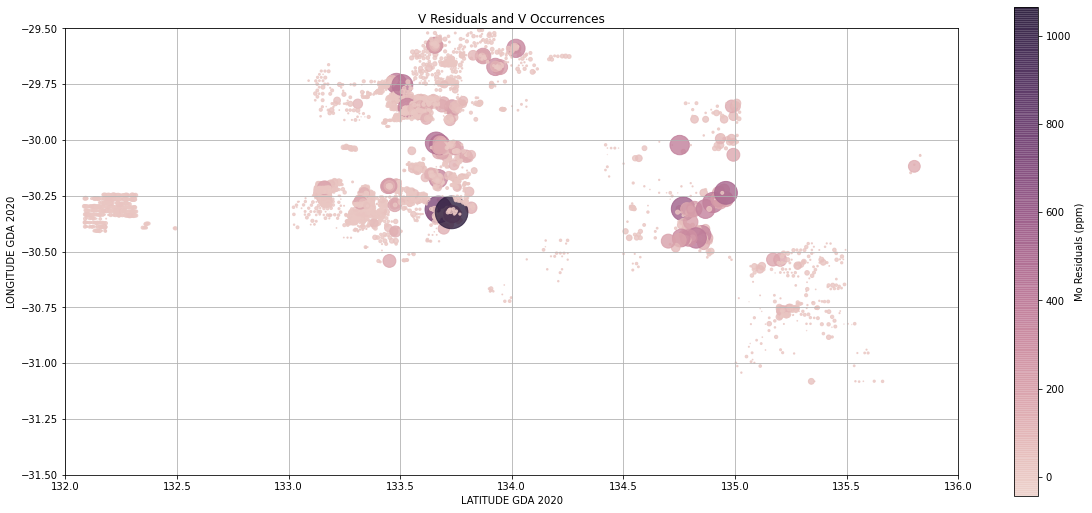

In [423]:
fig,ax = plt.subplots(figsize=[20,9])
cmap = sns.cubehelix_palette(as_cmap=True)
points = ax.scatter(x="LONGITUDE_GDA2020",y="LATITUDE_GDA2020",data=pca_map,c='V residuals',s='V residuals',
                     cmap=cmap,alpha=0.8,edgecolors=None)
fig.colorbar(points,label='Mo Residuals (ppm)')
mindep[mindep['V'] == True].plot(ax=ax,marker='*',color='orange',label='V Occurrences')
ax.set_xlim(132,136)
ax.set_ylim(-31.5,-29.5)
ax.set_xlabel('LATITUDE GDA 2020')
ax.set_ylabel('LONGITUDE GDA 2020')
ax.set_title('V Residuals and V Occurrences')
ax.grid(True)